## Background and Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.
Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas
You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards


## Objective

1.	Explore and visualize the dataset.
2.	Build a classification model to predict if the customer is going to churn or not
3.	Optimize the model using appropriate techniques
4.	Generate a set of insights and recommendations that will help the bank


## Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio


In [1]:
### Import libraries

import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import metrics

# import logistic Regression Model and other classifer models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier


# Help with testing and tuning model 
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

#Help with sampling and processing data
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#Pipeline modules
from sklearn.pipeline import Pipeline, make_pipeline

from datetime import datetime

In [2]:
Churn_df = pd.read_csv('BankChurners.csv') #Read in Churn data

**Review Sample of data**

In [3]:
Churn_df.sample(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
4567  810875958  Attrited Customer            51      F                3   
567   789115833  Existing Customer            44      M                4   
1254  771816408  Existing Customer            44      F                4   
1378  714787383  Existing Customer            32      F                0   
8991  709722858  Existing Customer            50      M                1   

     Education_Level Marital_Status Income_Category Card_Category  \
4567        Graduate        Married  Less than $40K          Blue   
567      High School         Single     $60K - $80K          Blue   
1254      Uneducated        Married  Less than $40K          Blue   
1378         College        Married         Unknown          Blue   
8991        Graduate        Married     $60K - $80K          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
4567              46  ...                       4                      3   
567               32  ...                       3                      2   
1254              33  ...                       4                      2   
1378              36  ...                       3                      3   
8991              37  ...                       2                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
4567        2016.0                  395           1621.0   
567         3233.0                 1034           2199.0   
1254        9671.0                  704           8967.0   
1378        6715.0                 1314           5401.0   
8991       20708.0                 1357          19351.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
4567                 0.711             2473              44   
567                  0.759             1256              29   
1254                 0.699             2955              66   
1378                 0.987             1731              41   
8991                 0.852             8503              88   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
4567                0.571                  0.196  
567                 0.706                  0.320  
1254                0.941                  0.073  
1378                0.519                  0.196  
8991                0.571                  0.066  

[5 rows x 21 columns]

- From the sample, the data looks well populated
- Their is a mix of numeric and alpha variable types

**Check Shape of Data, Check data types and number of non-null values for each column.**

In [4]:
Churn_df.shape

(10127, 21)

- There are 10,127 observation and 21 variables

In [5]:
Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- Doesn't to appear to be any null values since the non-null count is 10,127 for every column
- The target variable, Attrition_Flag,has dtype of Object. We will need to make this 1 and 0 at some point
- There are a total of 6 data type object varibles

In [6]:
Churn_df.isna().sum().sum()

0

Insights
- As another check, doesn't appear to be any null values

**Summary of Data**

In [7]:
Churn_df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Insights
- Clientnum is an identifer variable
- The average customer age is 46
- The median dependent count is 2
- average customer has 36 months on books
- The Credit Limits are right skewed the mean is 8.6k and median is 4.5k
- The average utilization ratio is 27% and the median utilization ratio is 17.6%

In [8]:
Churn_df.describe(include=['object']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

Insights
- Existing Customer is the most common Attrition_Flag
- There are 7 Education levels in the data
- Most of the Customers are Married and Make Less than $40k

In [9]:
Churn_df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

Insights
- As before, we can tell CLIENTNUM is an identifer variable. We will drop it


### Change the object type variables to Categorical variables for space

In [10]:
for feature in Churn_df.columns: # Loop through all columns in the dataframe
    if Churn_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        Churn_df[feature] = pd.Categorical(Churn_df[feature])# Change to categorical varible
Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

Insights
- All the variables are now category and numeric

### Review counts of the category variables

In [11]:
for feature in Churn_df.columns:
    if Churn_df[feature].name in Churn_df.select_dtypes(include='category').columns:
        print(Churn_df[feature].value_counts())
        print('-'*30)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------


Insights
- I am leaving the unknown Categories as is versus imputing them. There could be value in know something is unknown
- In variable Card_Category, it is heavily weighted to Blue. Will investigate to see if we can combine other categories or maybe drop the variable

### Drop client variable since it doesn't provide value

In [12]:
# Drop Client ID 
Churn_df.drop(columns=['CLIENTNUM'], inplace=True)

## Perform an Exploratory Data Analysis on the data

### Univariate analysis 

In [13]:
#Function to create Histogram and Boxplot
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

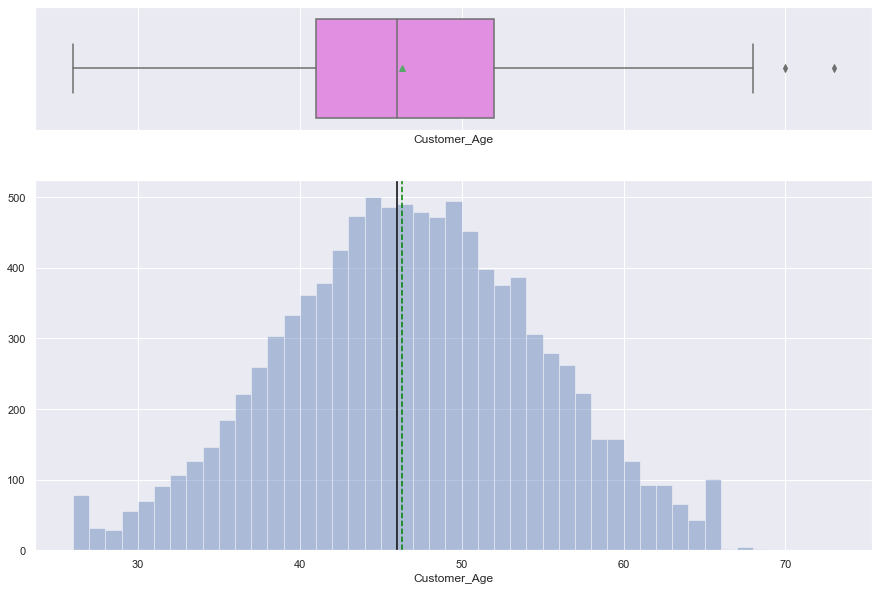

In [14]:
histogram_boxplot(Churn_df['Customer_Age'])

Insights
- The distbution is close to normal
- There are a couple of outliers, but they seem plausible

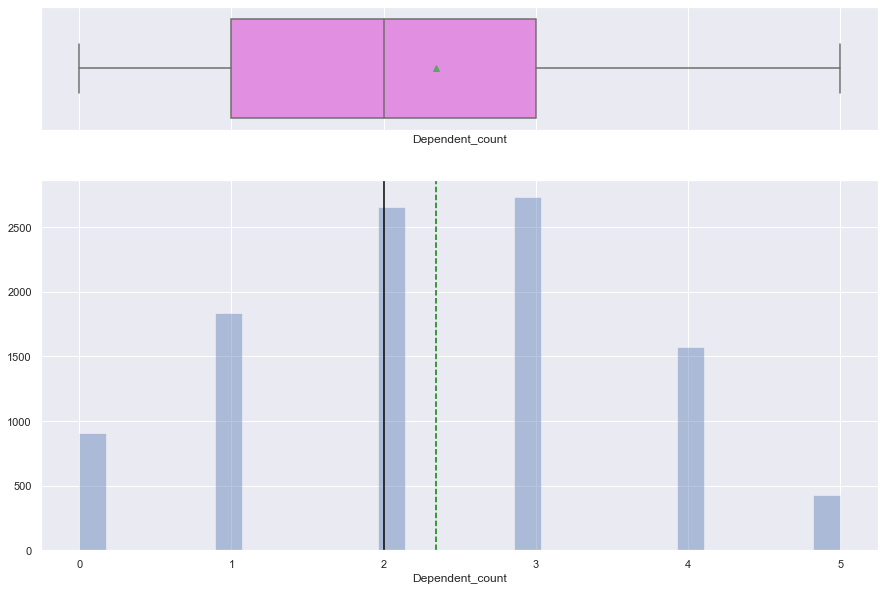

In [15]:
histogram_boxplot(Churn_df['Dependent_count'])

Insights
- Dependent_count is not a continous variable but a discrete one 
- 3 is the most common value
- 5 is the max value and 0 is the min value

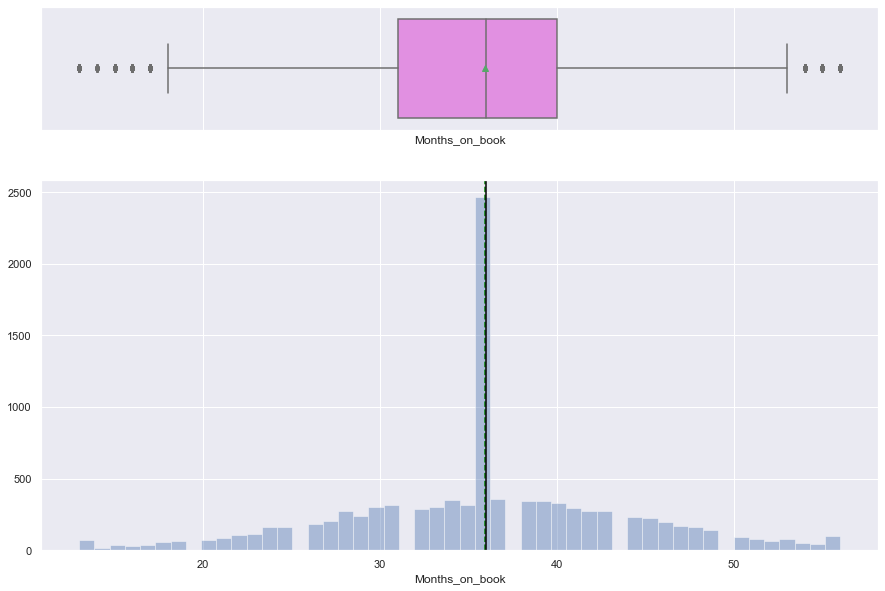

In [16]:
histogram_boxplot(Churn_df['Months_on_book'])

Insights
- 36 Months is by far the most common Months on the book
- The distribution is approximately symmetrical
- There are a couple of outliers but nothing that doesn't seem possible

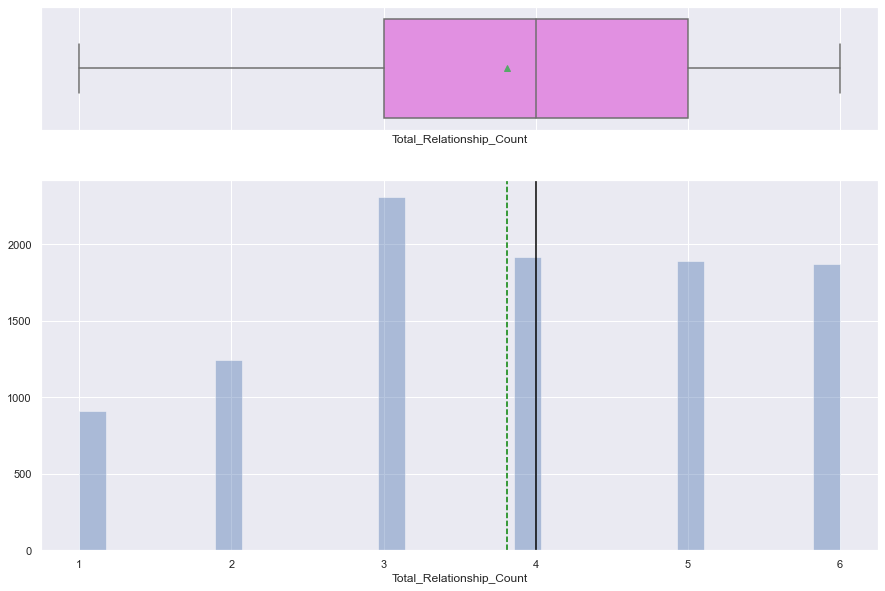

In [17]:
histogram_boxplot(Churn_df['Total_Relationship_Count'])

Insights
- 3 is the most common relationship count 
- There are no outliers
- Skewed to the left a little bit, but close to uniformly distibuted 

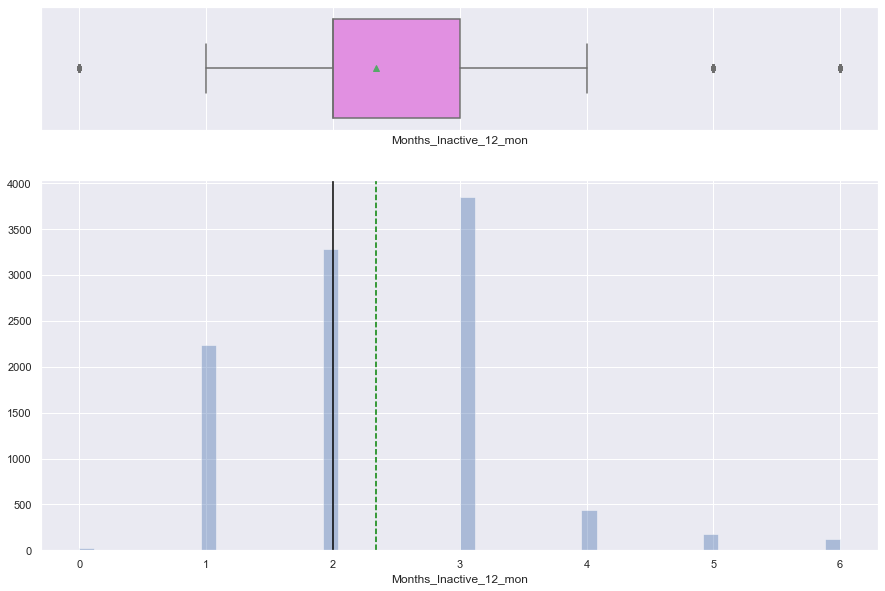

In [18]:
histogram_boxplot(Churn_df['Months_Inactive_12_mon'])

Insights
- 2 and 3 are the most common number of months of inactivity 
- The distribution is skewed to the right
- All of the numbers are in an acceptable range

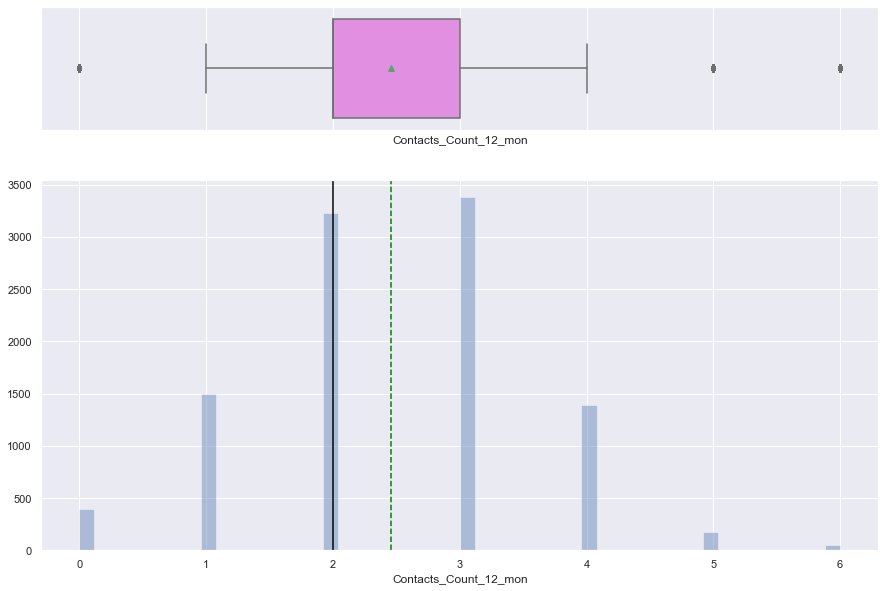

In [19]:
histogram_boxplot(Churn_df['Contacts_Count_12_mon'])

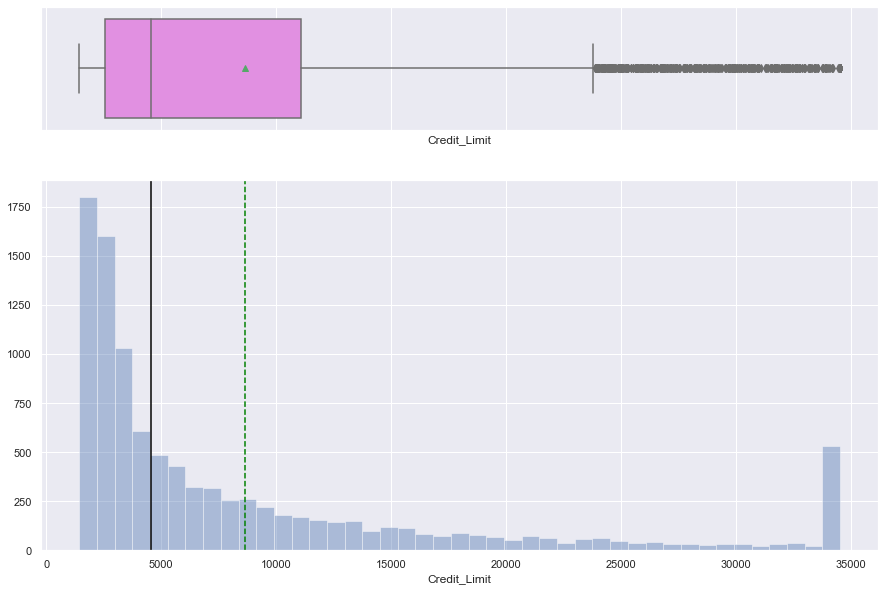

In [20]:
histogram_boxplot(Churn_df['Credit_Limit'])

Insights
- Credit limit is extremely right skewed
- There is a interesting pattern on the right end of the distribution. This might be to a policy of having a max credit limit policy. Therefore truncation the distribution.


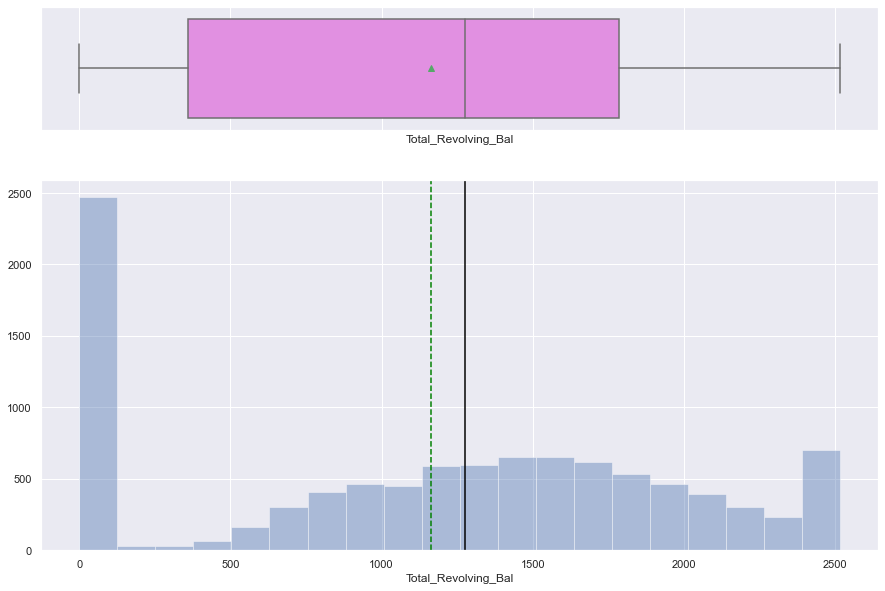

In [21]:
histogram_boxplot(Churn_df['Total_Revolving_Bal'])

Insights
- Total_Revolving_Bal has mass of counts at 0 then has somewhat a normal distribution then a mass of counts at the end


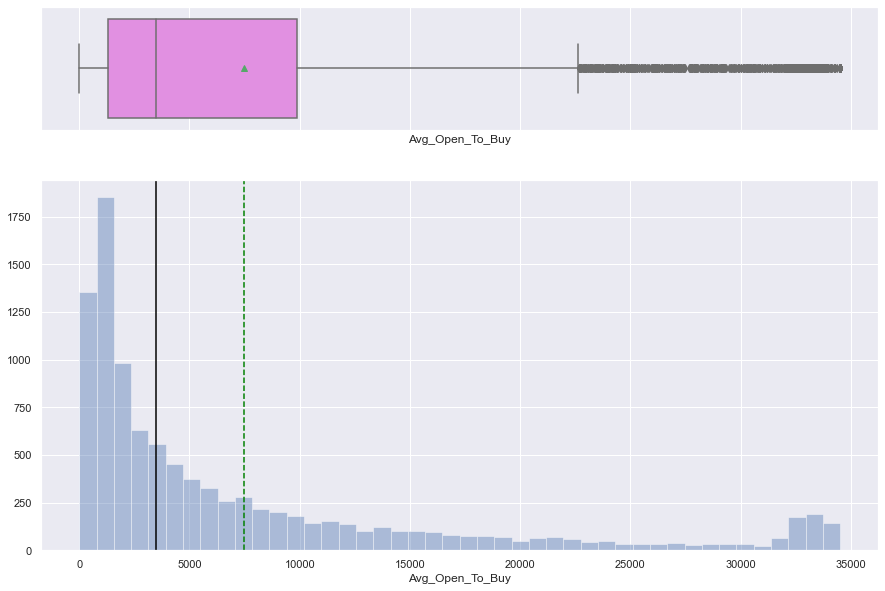

In [22]:
histogram_boxplot(Churn_df['Avg_Open_To_Buy'])

Insights
- Avg_Open_To_Buy is skewed to the right 
- This varible is a candidate to bucket

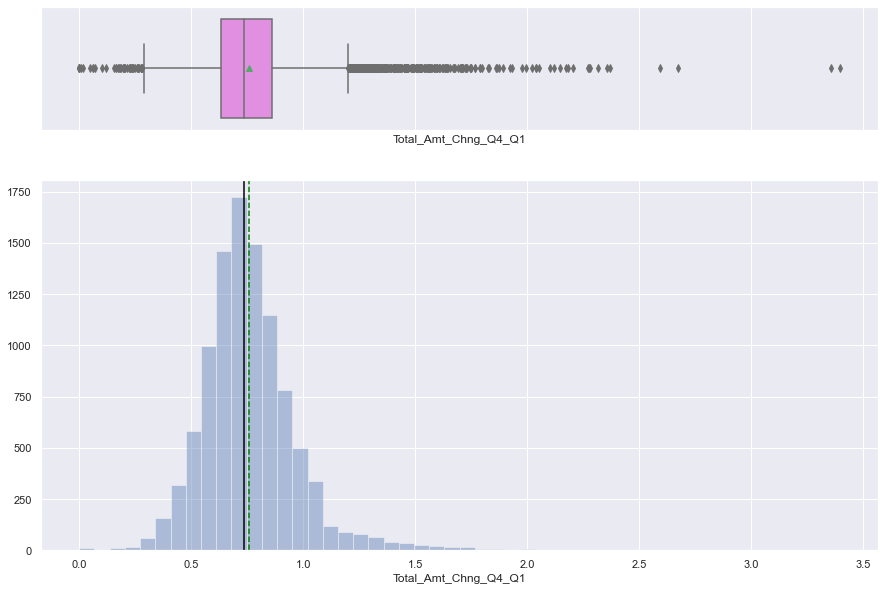

In [23]:
histogram_boxplot(Churn_df['Total_Amt_Chng_Q4_Q1'])

Insight

-Total_Amt_Chng_Q4_Q1 is slightly right skewed



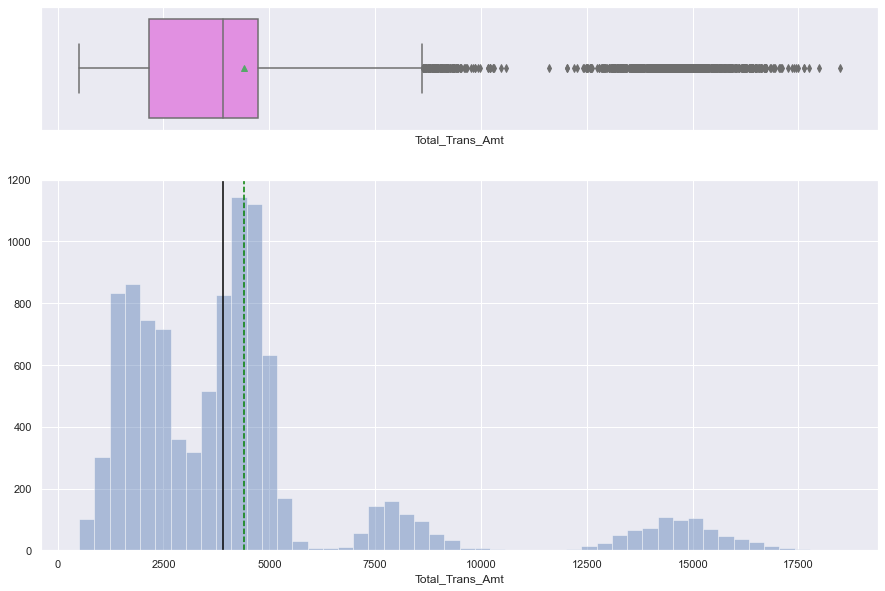

In [24]:
histogram_boxplot(Churn_df['Total_Trans_Amt'])

Insights
- Total_Trans_Amt looks like it has a four underlying distrubtions
- Will need to review other variables to see if there is an interaction 

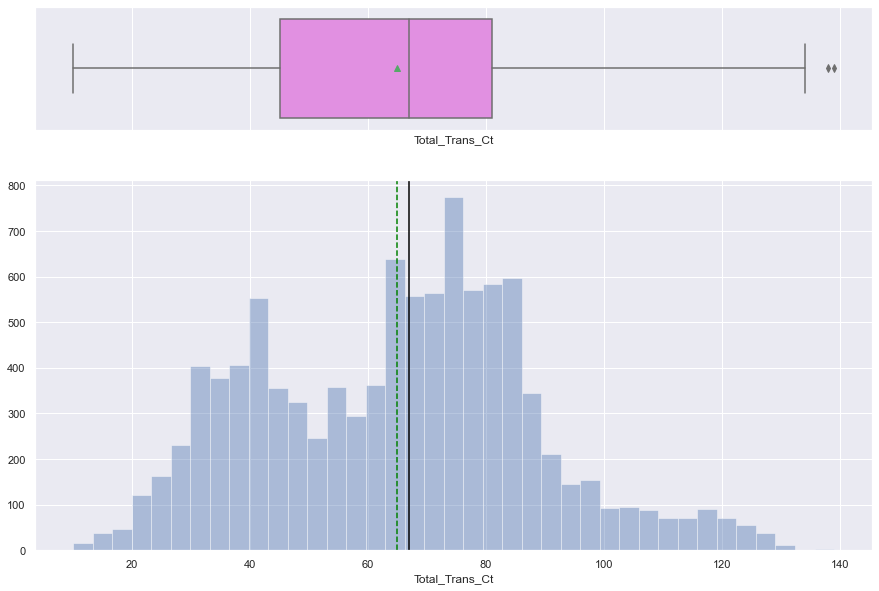

In [25]:
histogram_boxplot(Churn_df['Total_Trans_Ct'])

Insights
- Total_Trans_Ct is a bimodal distribution
- This might make this varible tough to use for logistict regression

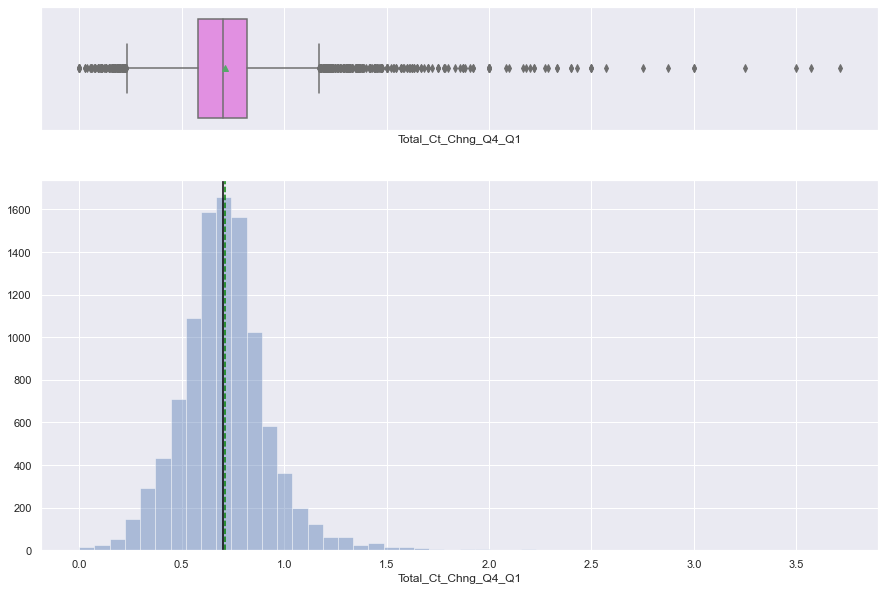

In [26]:
histogram_boxplot(Churn_df['Total_Ct_Chng_Q4_Q1'])

Insights
- Total_Ct_Chng_Q4_Q1 has a lot of outliers to the right, but there don't have a lot of mass as the mean and median are close to each other


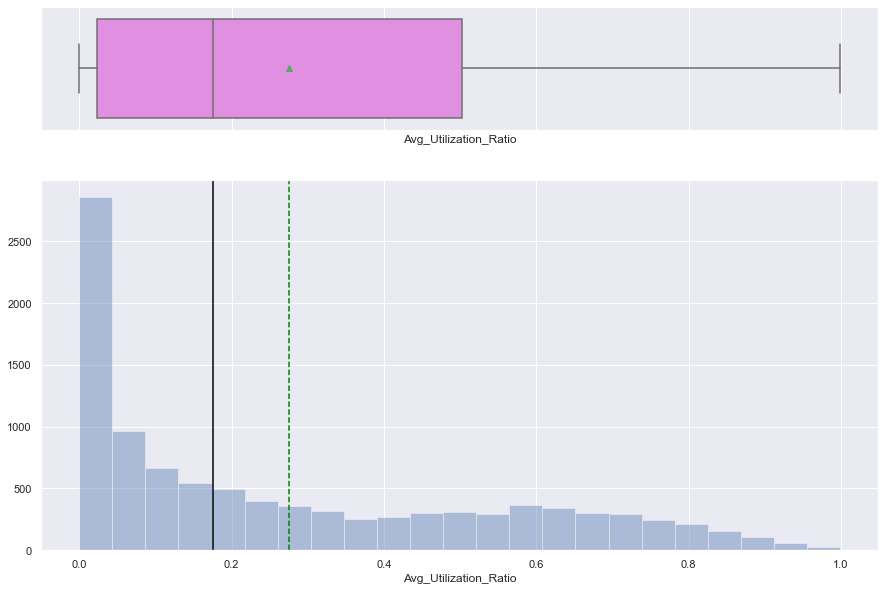

In [27]:
histogram_boxplot(Churn_df['Avg_Utilization_Ratio'])

Insights
- 0 is the most common utilization 
- the distribution is not symmetrical 

## Review Categorical Variables

**Function to create Bar Charts of percentages**

In [28]:
def perc_on_bar(feature):
 
    sns.set(rc={'figure.figsize':(9,3)})
    ax=sns.countplot(x=feature, data=Churn_df)
    
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.25 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 10) 
        
    plt.show() 

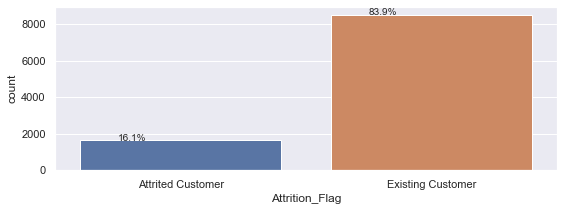

In [29]:
perc_on_bar(Churn_df['Attrition_Flag'])

Insights
- This is the the target variable.
- Attrited Customer is underrepresented at 16%

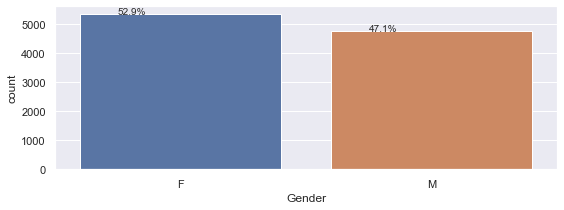

In [30]:
perc_on_bar(Churn_df['Gender'])

Insights
- The data is roughly equal between Male and Female

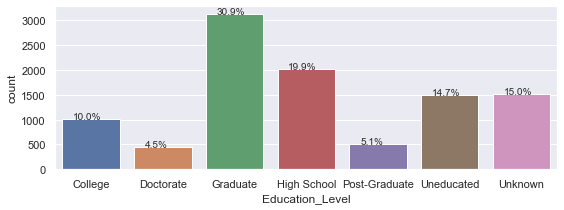

In [31]:
 perc_on_bar(Churn_df['Education_Level'])

Insights
- Graduate is the most common education level followed by High School
- There is a substantial that is unknown 

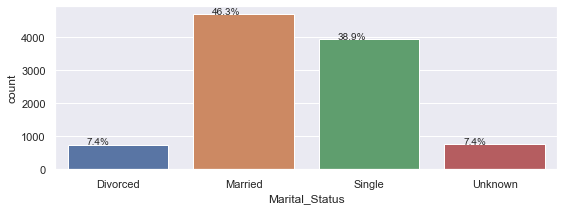

In [32]:
perc_on_bar(Churn_df['Marital_Status'])

Insights
- Most of the customers are either Married or Single
- 7.4% of the customers have unknown Marital Status 

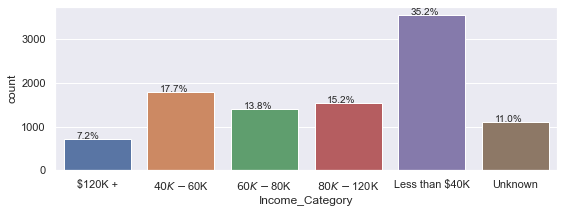

In [33]:
perc_on_bar(Churn_df['Income_Category'])

Insights
- This is a ordinal type variable.
- The highest concentration of customers are Less than $40k
- This variable is a good candidate to recode to number to take advantage of the ordinal properties 

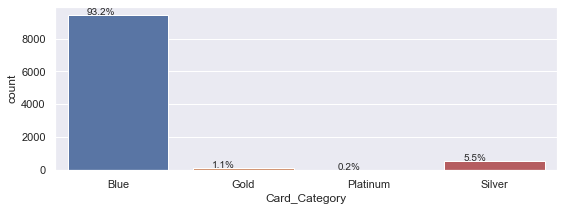

In [34]:
perc_on_bar(Churn_df['Card_Category'])

Insights
- Blue Category is overwhelming the most common category at 93%
- Depending on the Bivariate analysis, we might want to drop

### Bivariate analysis 

#### Review pairplot for continuous variables

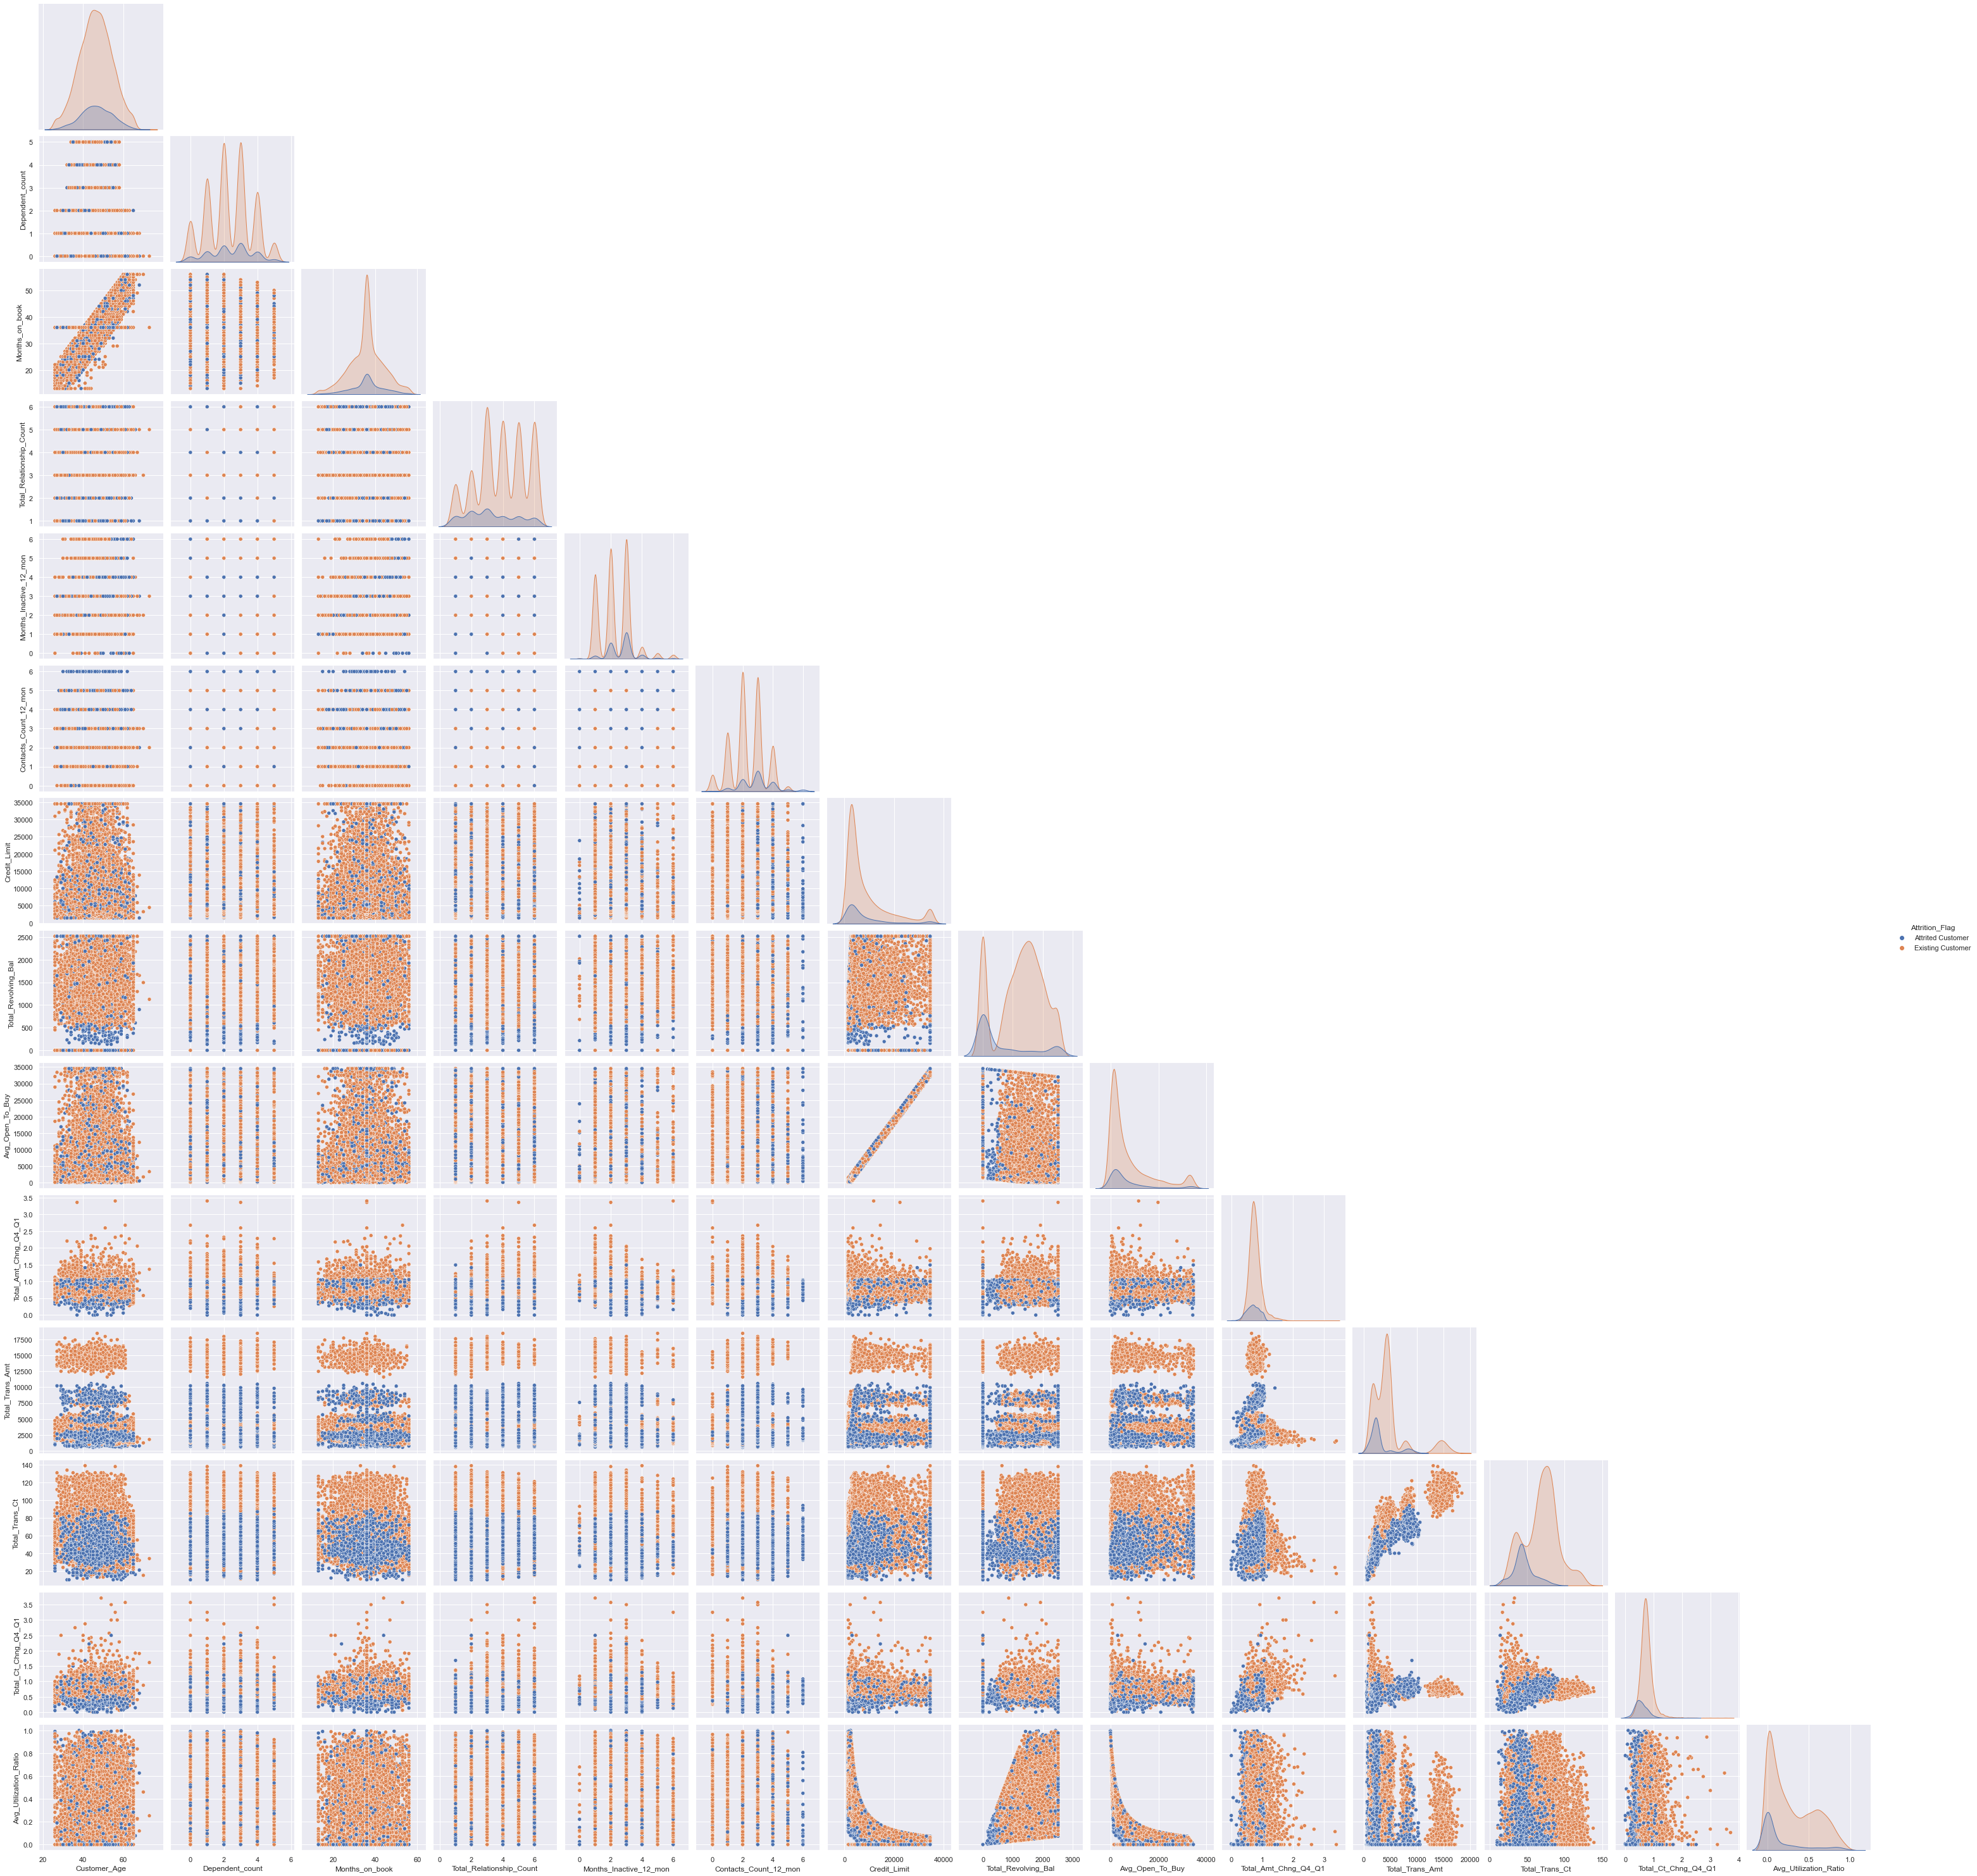

In [35]:
sns.pairplot(Churn_df, height=3, diag_kind='auto', corner=True, hue = 'Attrition_Flag');

Insights
- Credit_limit and Avg_Open_To_Buy  are almost perfectly correlated. Should drop one of these variables
- Total_Trans_Amt and Total_Trans_Ct  are strongly correlated
- Months_on_book and Customer_Age are correlated, Also, there is interesting behavior of 36 months being common across all ages

#### Review Correlation Heat Map

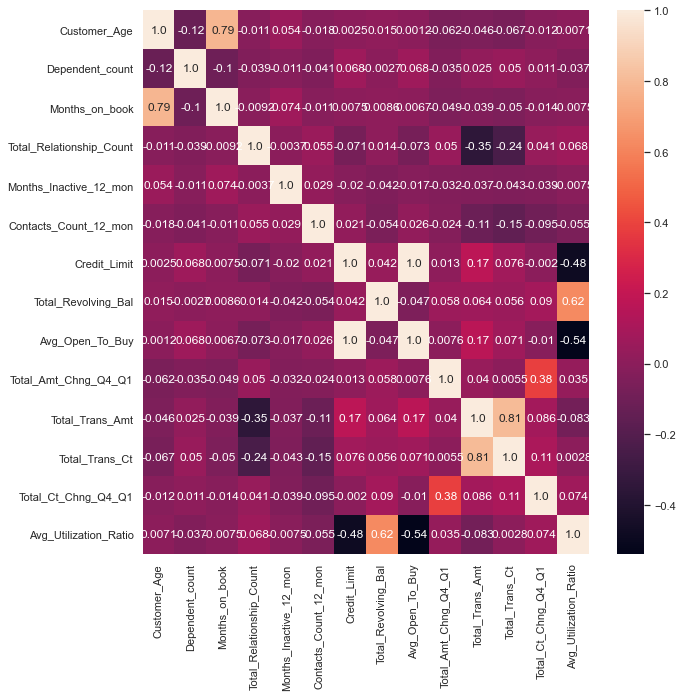

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(Churn_df.corr(), annot=True, fmt=".2")
plt.show()

Insights
- Confirms that Avg_Open_To_Buy and Credit_Limit are perfectly correlated
- Also, confirms Total_Trans_Amt and Total_Trans_Ct are highly correlated
- Total_Revolving_Bal and Avg_Utilization_Ratio are correlated

### Reviews crosstab of categorical varibles with proportion of Attrition_Flag

In [37]:
pd.crosstab(Churn_df['Gender'],Churn_df['Attrition_Flag'],normalize='index')

Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                        0.173572           0.826428
M                        0.146152           0.853848

Insights
- Proportions of Attrition_Flag is not very different between female and male

In [38]:
pd.crosstab(Churn_df['Dependent_count'],Churn_df['Attrition_Flag'],normalize='index')

Attrition_Flag   Attrited Customer  Existing Customer
Dependent_count                                      
0                         0.149336           0.850664
1                         0.146355           0.853645
2                         0.157062           0.842938
3                         0.176428           0.823572
4                         0.165184           0.834816
5                         0.150943           0.849057

Insights
- Proportions of Attrition_Flag is not very different between the Dependent_counts

In [39]:
pd.crosstab(Churn_df['Education_Level'],Churn_df['Attrition_Flag'],normalize='index')

Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                   0.152024           0.847976
Doctorate                 0.210643           0.789357
Graduate                  0.155691           0.844309
High School               0.152012           0.847988
Post-Graduate             0.178295           0.821705
Uneducated                0.159381           0.840619
Unknown                   0.168532           0.831468

Insights
- Doctorates are more likely to attrite than the other education levels

In [40]:
pd.crosstab(Churn_df['Marital_Status'],Churn_df['Attrition_Flag'],normalize='index')

Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                 0.161765           0.838235
Married                  0.151269           0.848731
Single                   0.169414           0.830586
Unknown                  0.172230           0.827770

Insights
- Marital Status by itself doesn't look very predictive since proportions are similar

In [41]:
pd.crosstab(Churn_df['Income_Category'],Churn_df['Attrition_Flag'],normalize='index')

Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                   0.173315           0.826685
$40K - $60K               0.151397           0.848603
$60K - $80K               0.134807           0.865193
$80K - $120K              0.157655           0.842345
Less than $40K            0.171862           0.828138
Unknown                   0.168165           0.831835

Insights
- 40k to 60 are less likey to attrite compared to the other income levels

In [42]:
pd.crosstab(Churn_df['Card_Category'],Churn_df['Attrition_Flag'],normalize='index')

Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
Blue                     0.160979           0.839021
Gold                     0.181034           0.818966
Platinum                 0.250000           0.750000
Silver                   0.147748           0.852252

Insights
- Platinum card category is most likely to attrite. There is a low amount of customers in this category. So, might not be very predictive

### Review the continous variables using distbrution plots

In [43]:
def cont_plot(feature):
    
    sns.distplot(Churn_df[Churn_df['Attrition_Flag']=='Existing Customer'][feature],color='r',label='Existing Customer', bins=31)
    sns.distplot(Churn_df[Churn_df['Attrition_Flag']=='Attrited Customer'][feature],color='g',label='Attrited Customer', bins=31)
    plt.legend()
    plt.show()

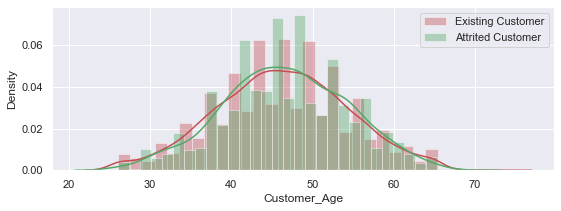

In [44]:
cont_plot('Customer_Age')

Insights
- Distribution of Cusomer_age look similar between Existing Customers and Attrited Customers

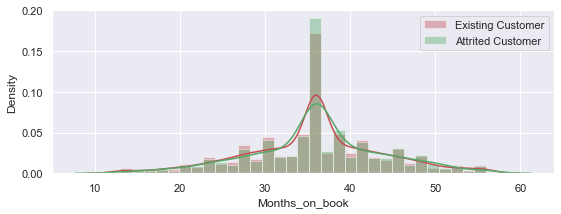

In [45]:
cont_plot('Months_on_book')

Insights
- Distribution of Months_on_book look similar between Existing Customers and Attrited Customers

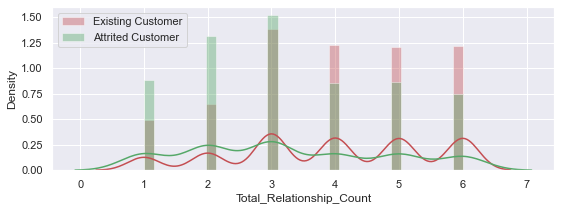

In [46]:
cont_plot('Total_Relationship_Count')

Insights
- Existing Customer have a higher Total_Relationship_count than Attrited Customers


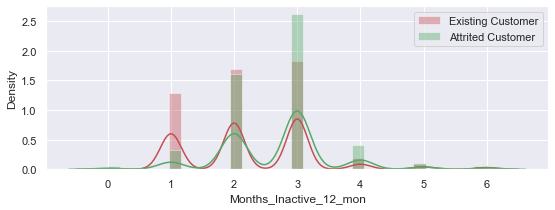

In [47]:
cont_plot('Months_Inactive_12_mon')

Insights
- Existing Customer are more active than Attrited Customers

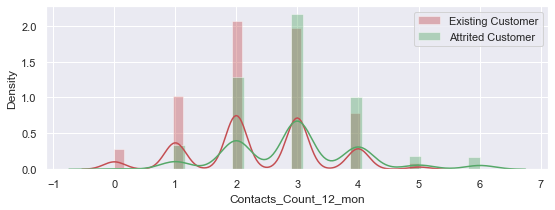

In [48]:
cont_plot('Contacts_Count_12_mon')

Insights
- Existing Customer have less contacts during 12 months

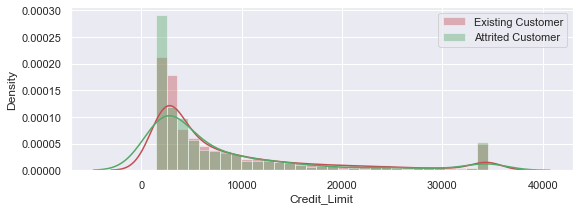

In [49]:
cont_plot('Credit_Limit')

Insights
- Distribution of Credit_Limit look similar between Existing Customers and Attrited Customers

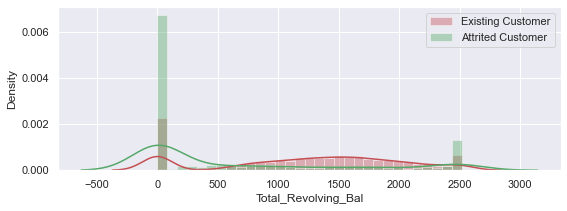

In [50]:
cont_plot('Total_Revolving_Bal')

Insights
- Existing customers generally have a higher Total_Revolving_Bal
- Attrited Customers have high prevalence of zero Total_Revolving_Bal  

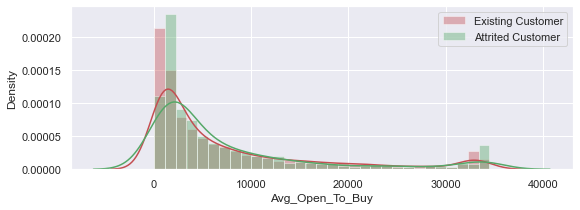

In [51]:
cont_plot('Avg_Open_To_Buy')

Insights
- Distribution of Avg_Open_To_Buy look similar between Existing Customers and Attrited Customers

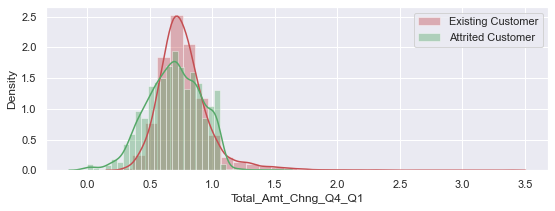

In [52]:
cont_plot('Total_Amt_Chng_Q4_Q1')

Insights
- Distribution of Total_Amt_Chng_Q4_Q1 look similar between Existing Customers and Attrited Customers

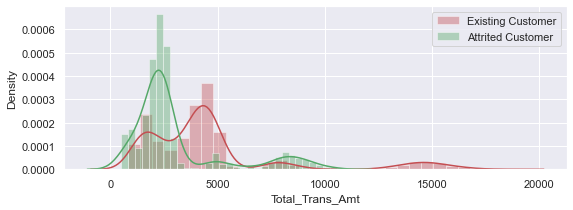

In [53]:
cont_plot('Total_Trans_Amt')

Insights
- Existing Customers generally have more Total_trans_Amt than Attrited Customers. This should be a predictive Variable

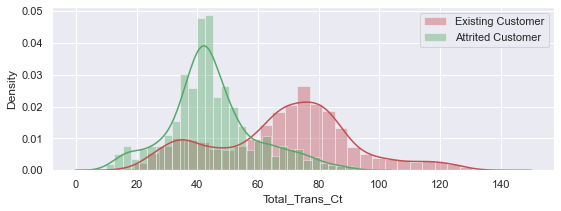

In [54]:
cont_plot('Total_Trans_Ct')

Insights
- Existing Customers generally have more Total_trans_Cnt than Attrited Customers. This should be a predictive Variable

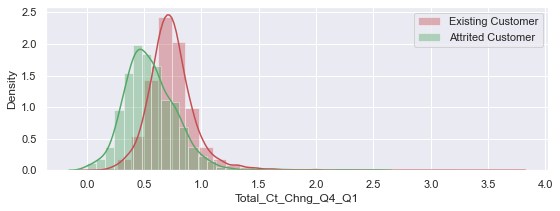

In [55]:
cont_plot('Total_Ct_Chng_Q4_Q1')

Insights
- Existing Customers generally have more Total_Ct_Chng_Q4_Q1 than Attrited Customers. This should be a predictive Variable

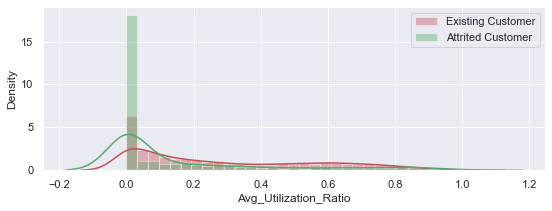

In [56]:
cont_plot('Avg_Utilization_Ratio')

Insights
- Existing Customers generally have higher Avg_Utilization_Ratio than Attrited Customers.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

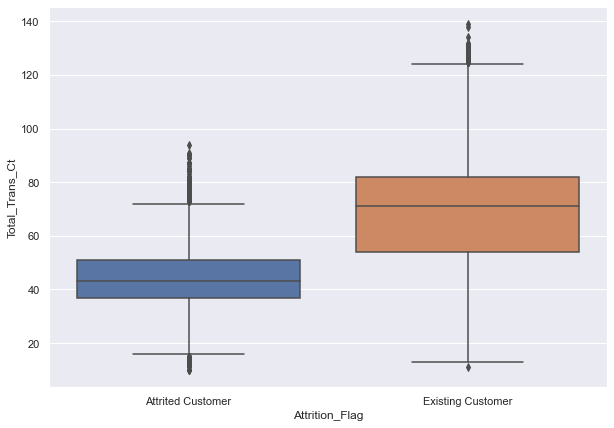

In [83]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Ct", x="Attrition_Flag", data=Churn_df, orient="vertical")

<AxesSubplot:xlabel='Gender', ylabel='Total_Trans_Ct'>

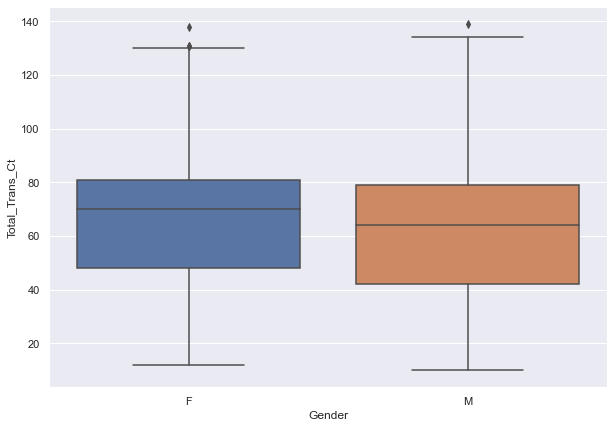

In [73]:
sns.boxplot(y="Total_Trans_Ct", x="Gender", data=Churn_df, orient="vertical")

<AxesSubplot:xlabel='Dependent_count', ylabel='Total_Trans_Ct'>

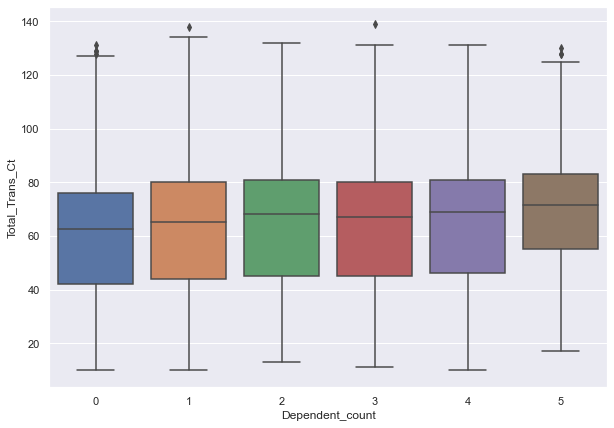

In [74]:
sns.boxplot(y="Total_Trans_Ct", x="Dependent_count", data=Churn_df, orient="vertical")

<AxesSubplot:xlabel='Education_Level', ylabel='Total_Trans_Ct'>

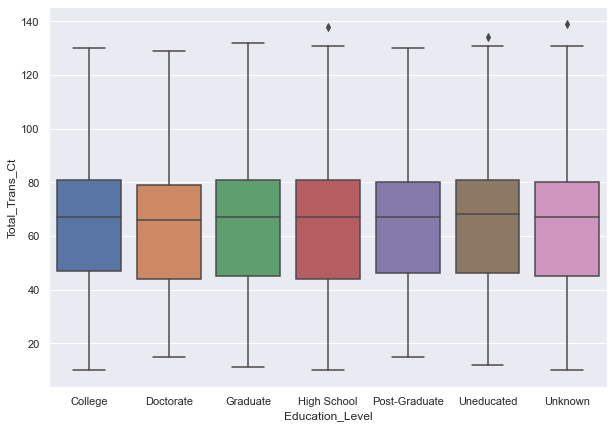

In [75]:
sns.boxplot(y="Total_Trans_Ct", x="Education_Level", data=Churn_df, orient="vertical")

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Trans_Ct'>

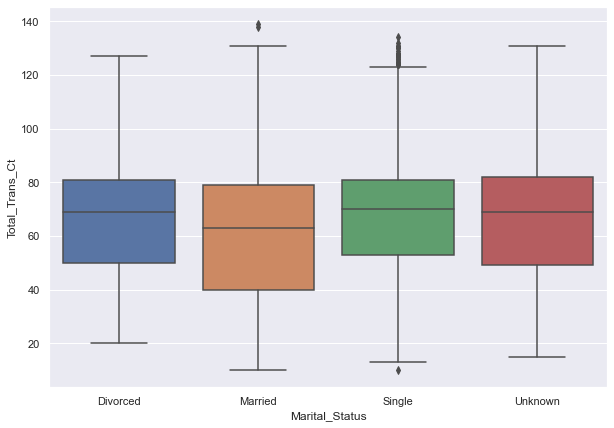

In [76]:
sns.boxplot(y="Total_Trans_Ct", x="Marital_Status", data=Churn_df, orient="vertical")

<AxesSubplot:xlabel='Income_Category', ylabel='Total_Trans_Ct'>

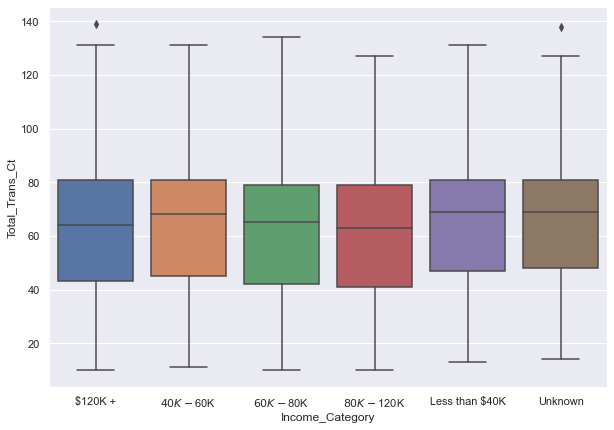

In [77]:
sns.boxplot(y="Total_Trans_Ct", x="Income_Category", data=Churn_df, orient="vertical")

<AxesSubplot:xlabel='Card_Category', ylabel='Total_Trans_Ct'>

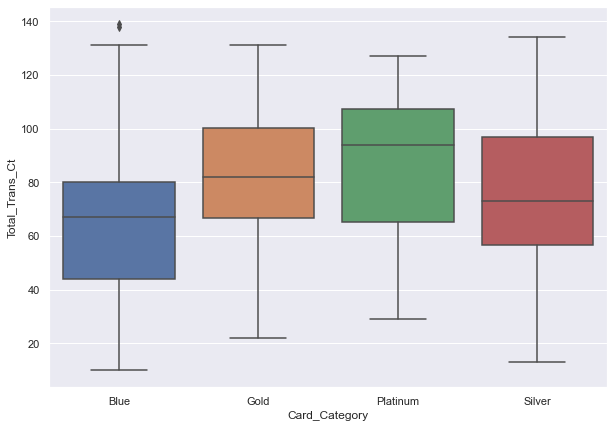

In [78]:
sns.boxplot(y="Total_Trans_Ct", x="Card_Category", data=Churn_df, orient="vertical")

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Total_Trans_Ct'>

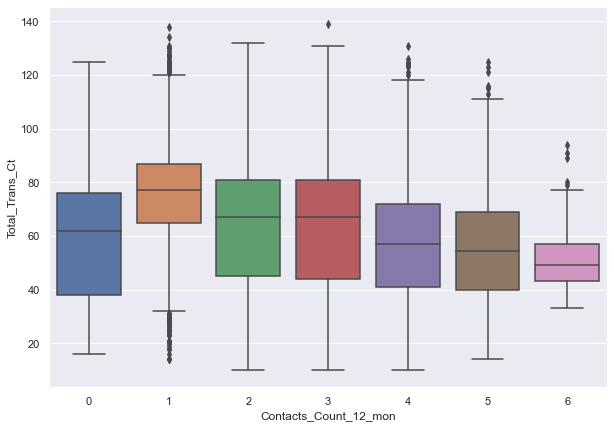

In [81]:
sns.boxplot(y="Total_Trans_Ct", x="Contacts_Count_12_mon", data=Churn_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

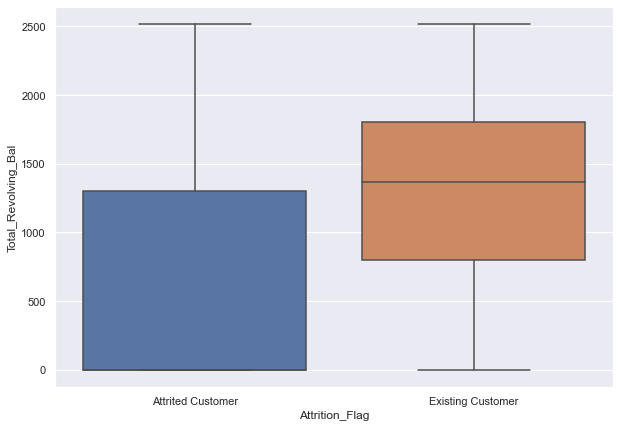

In [82]:
sns.boxplot(y="Total_Revolving_Bal", x="Attrition_Flag", data=Churn_df, orient="vertical")

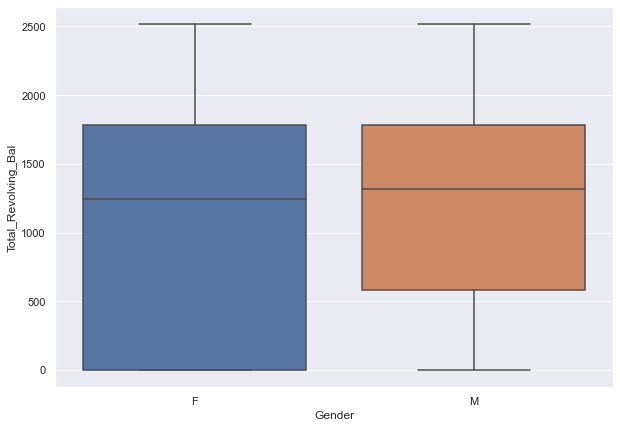

In [85]:
sns.boxplot(y="Total_Revolving_Bal", x="Gender", data=Churn_df, orient="vertical");

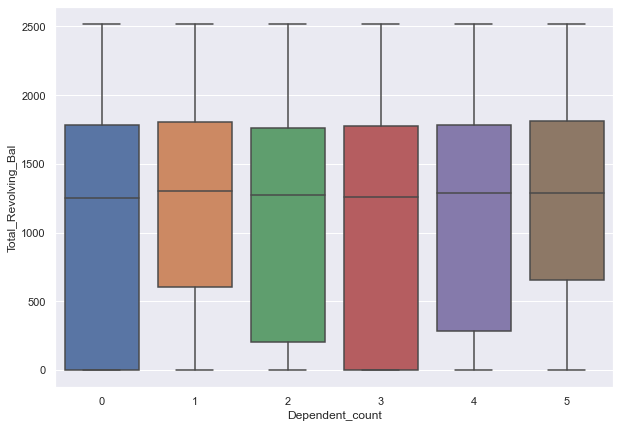

In [86]:
sns.boxplot(y="Total_Revolving_Bal", x="Dependent_count", data=Churn_df, orient="vertical");

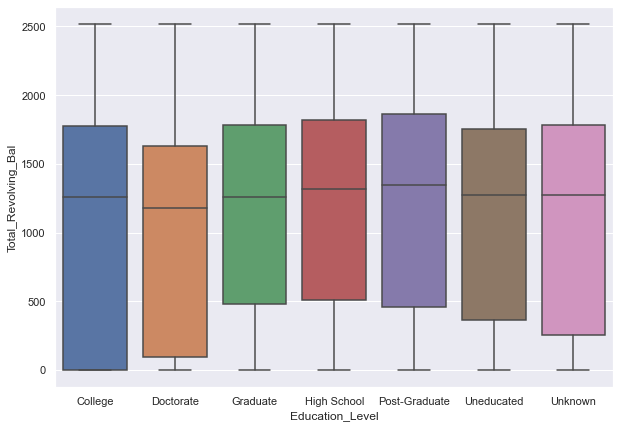

In [87]:
sns.boxplot(y="Total_Revolving_Bal", x="Education_Level", data=Churn_df, orient="vertical");

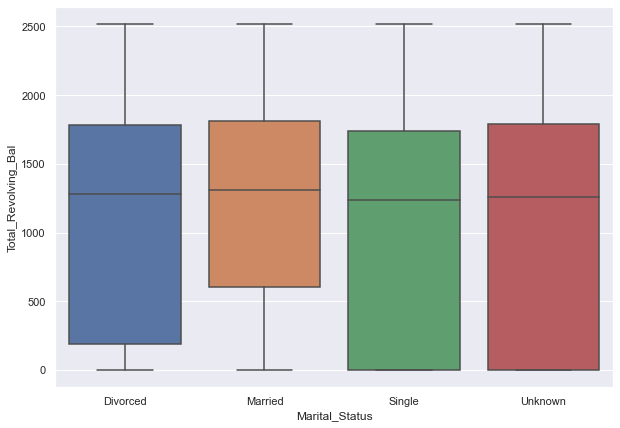

In [88]:
sns.boxplot(y="Total_Revolving_Bal", x="Marital_Status", data=Churn_df, orient="vertical");

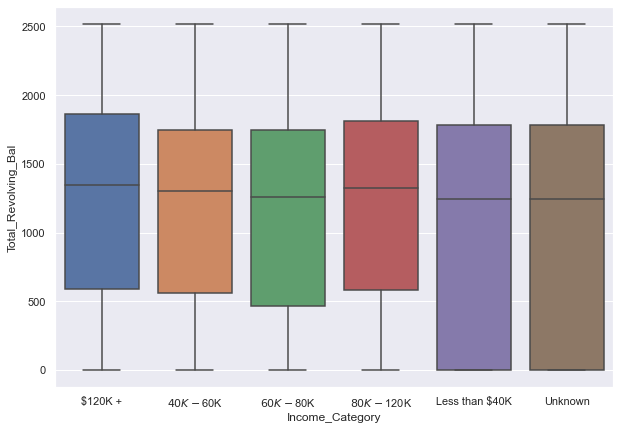

In [89]:
sns.boxplot(y="Total_Revolving_Bal", x="Income_Category", data=Churn_df, orient="vertical");

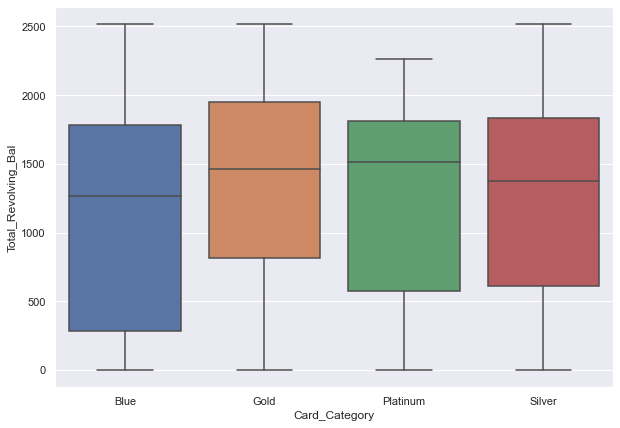

In [90]:
sns.boxplot(y="Total_Revolving_Bal", x="Card_Category", data=Churn_df, orient="vertical");

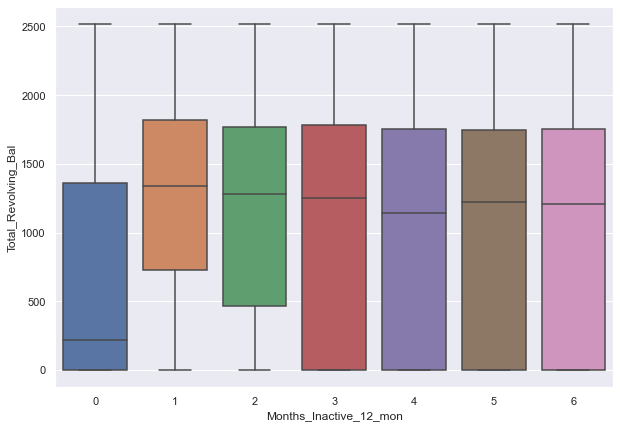

In [91]:
sns.boxplot(y="Total_Revolving_Bal", x="Months_Inactive_12_mon", data=Churn_df, orient="vertical");

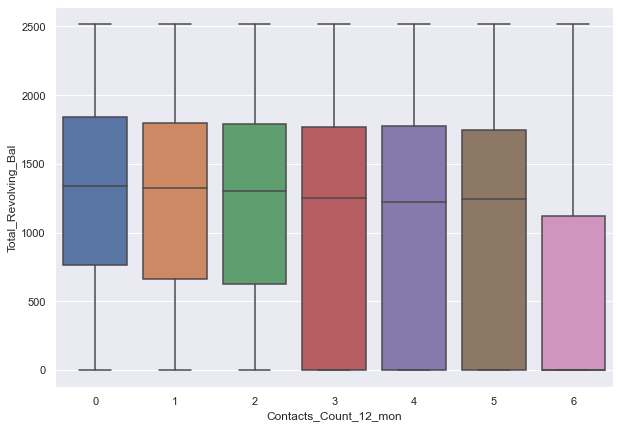

In [92]:
sns.boxplot(y="Total_Revolving_Bal", x="Contacts_Count_12_mon", data=Churn_df, orient="vertical");

### Create profile for Attrition status

In [57]:
Churn_df.groupby(['Attrition_Flag']).mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                     
Attrited Customer     46.659496         2.402581       36.178242   
Existing Customer     46.262118         2.335412       35.880588   

                   Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                        
Attrited Customer                  3.279656                2.693301   
Existing Customer                  3.914588                2.273765   

                   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                                
Attrited Customer               2.972342   8136.039459           672.822987   
Existing Customer               2.356353   8726.877518          1256.604118   

                   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                              
Attrited Customer      7463.216472              0.694277      3095.025814   
Existing Customer      7470.273400              0.772510      4654.655882   

                   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                                 
Attrited Customer       44.933620             0.554386               0.162475  
Existing Customer       68.672588             0.742434               0.296412

**Insights on profiles of Customers**
- Existing Customers in general have higher Total_Relationship_Count than Attrited Customers
- Existing Customers in general have lower Contacts count than Attrited Customers
- Existing Customers in general have higher Total_Revolving_Balance than Attrited Customers
- Existing Customers in general have higher Total_Trans_Amt than Attrited Customers
- Existing Customers in general have higher Total_Trans_Ct than Attrited Customers
- Existing Customers in general have higher Avg_Utilization_Ratio than Attrited Customers


### Data Pre-processing
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling


In [58]:
#Check for missing values
Churn_df.isnull().sum().sum()

0

In [59]:
Churn_df.info() #check data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [95]:
data=Churn_df.copy() #make copy of data before manipulations


**Create Maps to the bins for different variables**

In [96]:
#Map for Attrition_Flag to make it numeric
att_map={'Attrited Customer':1,
         'Existing Customer':0}
#Map for Income_Category so we can retain the Ordinal property
income_map={'Less than $40K':0,
            '$40K - $60K':1,
            '$60K - $80K':2,
            '$80K - $120K':3,
            '$120K +':4,
            'Unknown':-1}

**Remap Variables**

In [97]:
data['Attrition_Flag'].replace(att_map,inplace=True)
data['Income_Category'].replace(income_map,inplace=True)


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  int64   
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

**One hot encoding for the remaining category variables**

In [99]:
# Create one hot encoding

oneHotCols=["Gender","Education_Level","Marital_Status","Card_Category"]

In [100]:
data=pd.get_dummies(data, columns=oneHotCols,drop_first=True)

**Check to see all the data types are numeric before model building**

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attrition_Flag                 10127 non-null  int64  
 1   Customer_Age                   10127 non-null  int64  
 2   Dependent_count                10127 non-null  int64  
 3   Income_Category                10127 non-null  int64  
 4   Months_on_book                 10127 non-null  int64  
 5   Total_Relationship_Count       10127 non-null  int64  
 6   Months_Inactive_12_mon         10127 non-null  int64  
 7   Contacts_Count_12_mon          10127 non-null  int64  
 8   Credit_Limit                   10127 non-null  float64
 9   Total_Revolving_Bal            10127 non-null  int64  
 10  Avg_Open_To_Buy                10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1           10127 non-null  float64
 12  Total_Trans_Amt                10127 non-null 

Insights
- All the models are now of numerical datat type and are ready for modeling
- As a general note, I decided to not remove outliers because i feel they were within realistic ranges. If i was just doing logistic modeling I would have dealt with outliers either using clipping method or by a transformation. 
- I decided to leave unknown categories as i didn't want to have data loss from imputing them

**Drop unneeded variables**

In [102]:
data.drop("Avg_Open_To_Buy" , axis=1,inplace=True)

Insights
- Dropping Avg_Open_To_Buy since it is correlated with Credit_Limit

## Split the Data

In [103]:
data.columns = data.columns.str.replace(' ','_') #replace spaces in header with _ 

In [104]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Income_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High_School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [106]:
data_down=data.copy() #make copy of data for the downsampling for logistic Regression

In [70]:
X = data.drop("Attrition_Flag" , axis=1)
y = data.pop("Attrition_Flag")

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1) #30% of data is in test dataset

## Functions to create Confusion Matrix and Scoring Metrics 

In [117]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
  
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [118]:
##  Function to calculate Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
   
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall 
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list 

# Create upsample and down sample data sets for Logistic Regression 

## SMOTE to upsample smaller class

In [72]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 1139
Before UpSampling, counts of label '0': 5949 

After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 5949 

After UpSampling, the shape of train_X: (11898, 27)
After UpSampling, the shape of train_y: (11898,) 



### Down Sampling the larger class

In [107]:
Existing_indices = data_down[data_down['Attrition_Flag'] == 0].index   # Get the record numbers of Existing customers
no_Existing = len(data_down[data_down['Attrition_Flag'] == 0])             # how many Existing customers
print(no_Existing)

Attrited_indices = data_down[data_down['Attrition_Flag'] == 1].index   # Get the record numbers of Attrited Customers
no_Attrited = len(data_down[data_down['Attrition_Flag'] == 1])             # how many Attrited Customers
print(no_Attrited)

8500
1627


In [108]:
random_indices = np.random.choice( Existing_indices, no_Attrited , replace=False)    #Randomly pick up 200 non-diab indices

In [112]:
down_sample_indices = np.concatenate([Attrited_indices,random_indices])  # combine the 200 non-diab indices with diab indices

In [113]:
data_down_sample = data_down.loc[down_sample_indices]  # Extract all those records for diab and non-diab to create new set
data_down_sample.shape
data_down_sample.groupby(['Attrition_Flag']).count()  # look at the class distribution after downsample

Customer_Age  Dependent_count  Income_Category  \
Attrition_Flag                                                   
0                       1627             1627             1627   
1                       1627             1627             1627   

                Months_on_book  Total_Relationship_Count  \
Attrition_Flag                                             
0                         1627                      1627   
1                         1627                      1627   

                Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
Attrition_Flag                                                                
0                                 1627                   1627          1627   
1                                 1627                   1627          1627   

                Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  ...  \
Attrition_Flag                                             ...   
0                              1627                  1627  ...   
1                              1627                  1627  ...   

                Education_Level_High_School  Education_Level_Post-Graduate  \
Attrition_Flag                                                               
0                                      1627                           1627   
1                                      1627                           1627   

                Education_Level_Uneducated  Education_Level_Unknown  \
Attrition_Flag                                                        
0                                     1627                     1627   
1                                     1627                     1627   

                Marital_Status_Married  Marital_Status_Single  \
Attrition_Flag                                                  
0                                 1627                   1627   
1                                 1627                   1627   

                Marital_Status_Unknown  Card_Category_Gold  \
Attrition_Flag                                               
0                                 1627                1627   
1                                 1627                1627   

                Card_Category_Platinum  Card_Category_Silver  
Attrition_Flag                                                
0                                 1627                  1627  
1                                 1627                  1627  

[2 rows x 27 columns]

In [114]:
X_dwn = data_down_sample.drop("Attrition_Flag" , axis=1)
y_dwn = data_down_sample.pop("Attrition_Flag")

In [127]:
X_train_dwn, X_test_dwn, y_train_dwn, y_test_dwn = train_test_split(X_dwn, y_dwn, test_size=.30, random_state=1) #30% of data is in test dataset

# Create Logistic Regression Model on regular data set

In [119]:
logmodel=LogisticRegression(random_state=1,fit_intercept=False,solver = 'liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(fit_intercept=False, random_state=1, solver='liblinear')

### Scoring our Logistic Regression Model

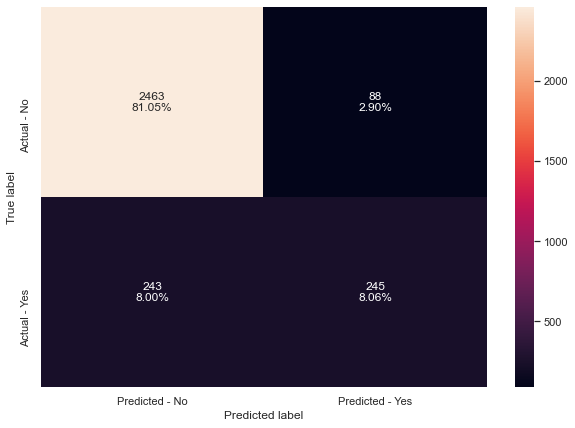

In [121]:
make_confusion_matrix(logmodel,y_test)

In [122]:
get_metrics_score(logmodel)

Accuracy on training set :  0.8970090293453724
Accuracy on test set :  0.8910825929582099
Recall on training set :  0.5285338015803336
Recall on test set :  0.5020491803278688
Precision on training set :  0.7572327044025158
Precision on test set :  0.7357357357357357


[0.8970090293453724,
 0.8910825929582099,
 0.5285338015803336,
 0.5020491803278688,
 0.7572327044025158,
 0.7357357357357357]

**Insights**
- Since we care about identify the Attrited Customer, I used recall as the scoring metric.
- The logistics model did not score very well with a recall of 50% on test data
- The model did not overfit the data


## Create Logistic Regresson on Upsampled data set

In [123]:
logmodelup=LogisticRegression(random_state=1,fit_intercept=False,solver = 'liblinear')
logmodelup.fit(X_train_res, y_train_res)

LogisticRegression(fit_intercept=False, random_state=1, solver='liblinear')

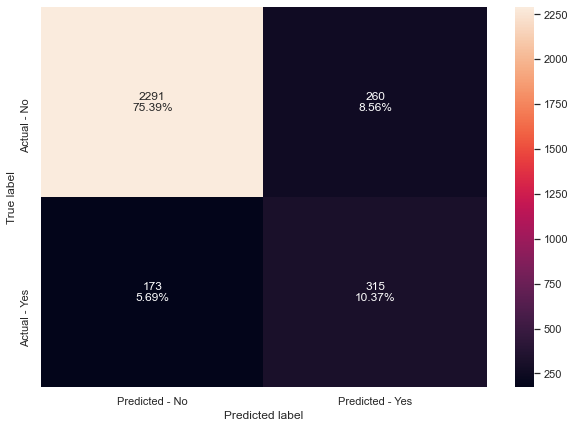

In [125]:
make_confusion_matrix(logmodelup,y_test)

In [126]:
get_metrics_score(logmodelup)

Accuracy on training set :  0.8529909706546276
Accuracy on test set :  0.8575189206975979
Recall on training set :  0.655838454784899
Recall on test set :  0.6454918032786885
Precision on training set :  0.5347172512526843
Precision on test set :  0.5478260869565217


[0.8529909706546276,
 0.8575189206975979,
 0.655838454784899,
 0.6454918032786885,
 0.5347172512526843,
 0.5478260869565217]

**Insights**
- Upsampling the date using SMOTE improved the recall from 50% in the regular data set up to 65% in the upsampled data set
- The model did not overfit the data as metrics are similar between the training and test sets


## Create Logistic Regresson on Downsampled data set

In [128]:
logmodeldwn=LogisticRegression(random_state=1,fit_intercept=False,solver = 'liblinear')
logmodeldwn.fit(X_train_dwn, y_train_dwn)

LogisticRegression(fit_intercept=False, random_state=1, solver='liblinear')

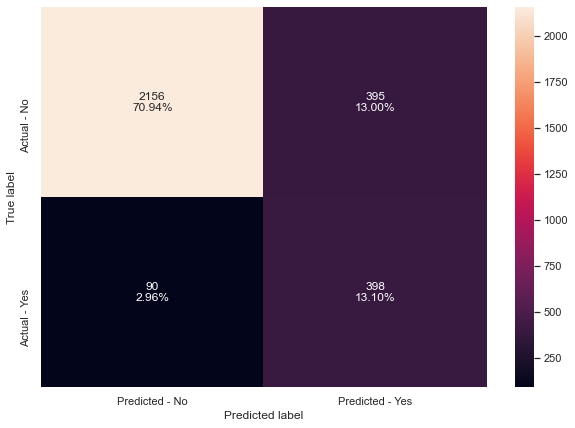

In [129]:
make_confusion_matrix(logmodeldwn,y_test)

In [130]:
get_metrics_score(logmodeldwn)

Accuracy on training set :  0.8278781038374717
Accuracy on test set :  0.8404080289568937
Recall on training set :  0.8244073748902546
Recall on test set :  0.8155737704918032
Precision on training set :  0.4793261868300153
Precision on test set :  0.501891551071879


[0.8278781038374717,
 0.8404080289568937,
 0.8244073748902546,
 0.8155737704918032,
 0.4793261868300153,
 0.501891551071879]

**Insights**
- The recall for the downsampled model is 82% for both the training and test set
- The downsampled model did better than both the regular and upsampled logistic models

### Build Decision Tree Model

In [131]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

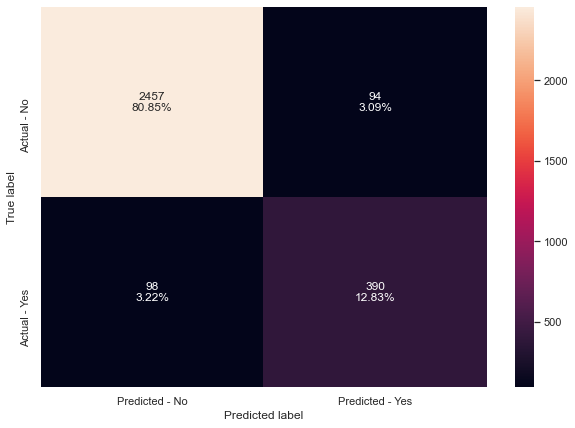

In [133]:
make_confusion_matrix(dTree,y_test)

In [147]:
get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9368213228035538
Recall on training set :  1.0
Recall on test set :  0.7991803278688525
Precision on training set :  1.0
Precision on test set :  0.8057851239669421


[1.0, 0.9368213228035538, 1.0, 0.7991803278688525, 1.0, 0.8057851239669421]

In [148]:
feature_names = list(X.columns)

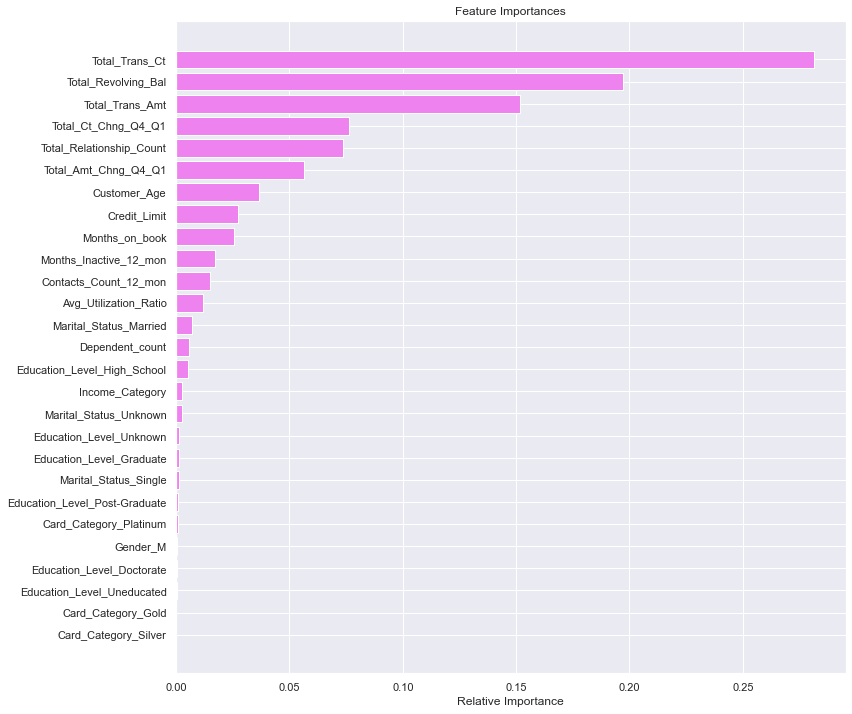

In [135]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**
- The dtree overfit the data as recall is 100% for training data and 80% for test data
- The most important variable was Total_Trans_Ct

### Build Decision Tree Model using grid search


In [149]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))
dtree_tuned_gs = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
               "decisiontreeclassifier__class_weight": [{0: 0.20, 1: 0.8}],
               'decisiontreeclassifier__max_depth': np.arange(1,20), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10],
              'decisiontreeclassifier__min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()
grid_obj = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=acc_scorer,cv=5,verbose=10,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

dtree_tuned_gs = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned_gs.fit(X_train, y_train)

Fitting 5 folds for each of 1596 candidates, totalling 7980 fits
Grid Search takes 1.20 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8},
                                        max_depth=4, max_leaf_nodes=10,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=15, random_state=1))])

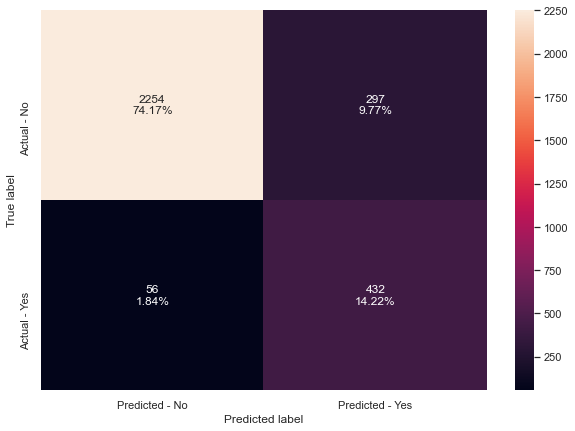

In [150]:
make_confusion_matrix(dtree_tuned_gs,y_test)

In [151]:
get_metrics_score(dtree_tuned_gs)

Accuracy on training set :  0.8812076749435666
Accuracy on test set :  0.8838433695294505
Recall on training set :  0.9165935030728709
Recall on test set :  0.8852459016393442
Precision on training set :  0.5829145728643216
Precision on test set :  0.5925925925925926


[0.8812076749435666,
 0.8838433695294505,
 0.9165935030728709,
 0.8852459016393442,
 0.5829145728643216,
 0.5925925925925926]

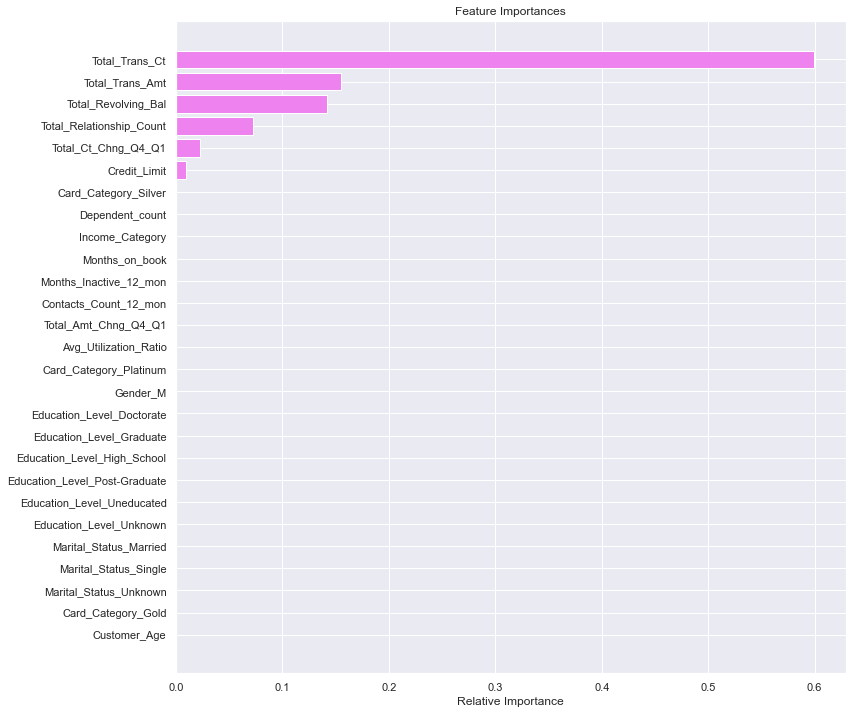

In [152]:
importances =dtree_tuned_gs[-1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


**Insights**
- The decision gridsearch model fit the data well as recall is 92% for training data and 89% for test data
- The most important variable was Total_Trans_Ct

### Build Decision Tree Model using Random search

In [153]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))
dtree_tuned_rs = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
               "decisiontreeclassifier__class_weight": [{0: 0.20, 1: 0.8}],
               'decisiontreeclassifier__max_depth': np.arange(1,50,1), 
              'decisiontreeclassifier__min_samples_leaf': np.arange(1,50,2),
              'decisiontreeclassifier__max_leaf_nodes' : np.arange(1,30,2),
              'decisiontreeclassifier__min_impurity_decrease': np.arange(0,.2,.001)
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, n_iter=50, scoring=acc_scorer, cv=5, random_state=1,verbose=10,n_jobs=-1)
# Rand_obj = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=acc_scorer,cv=5,verbose=10,n_jobs=-1)



randomized_cv = randomized_cv.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

dtree_tuned_rs = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned_rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Grid Search takes 0.10 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8},
                                        max_depth=9, max_leaf_nodes=19,
                                        min_impurity_decrease=0.003,
                                        min_samples_leaf=45, random_state=1))])

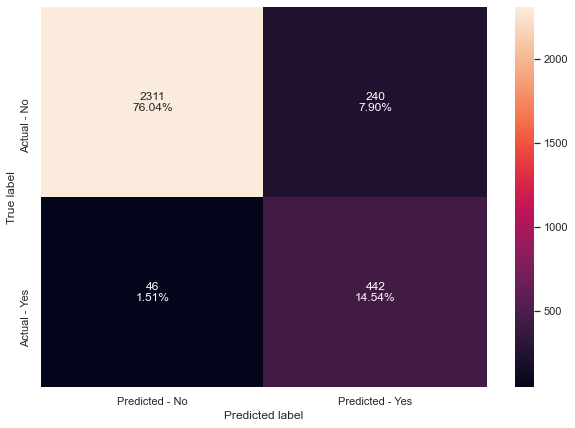

In [154]:
make_confusion_matrix(dtree_tuned_rs,y_test)

In [155]:
get_metrics_score(dtree_tuned_rs)

Accuracy on training set :  0.9080135440180587
Accuracy on test set :  0.905890095426127
Recall on training set :  0.926251097453907
Recall on test set :  0.9057377049180327
Precision on training set :  0.6500308071472581
Precision on test set :  0.6480938416422287


[0.9080135440180587,
 0.905890095426127,
 0.926251097453907,
 0.9057377049180327,
 0.6500308071472581,
 0.6480938416422287]

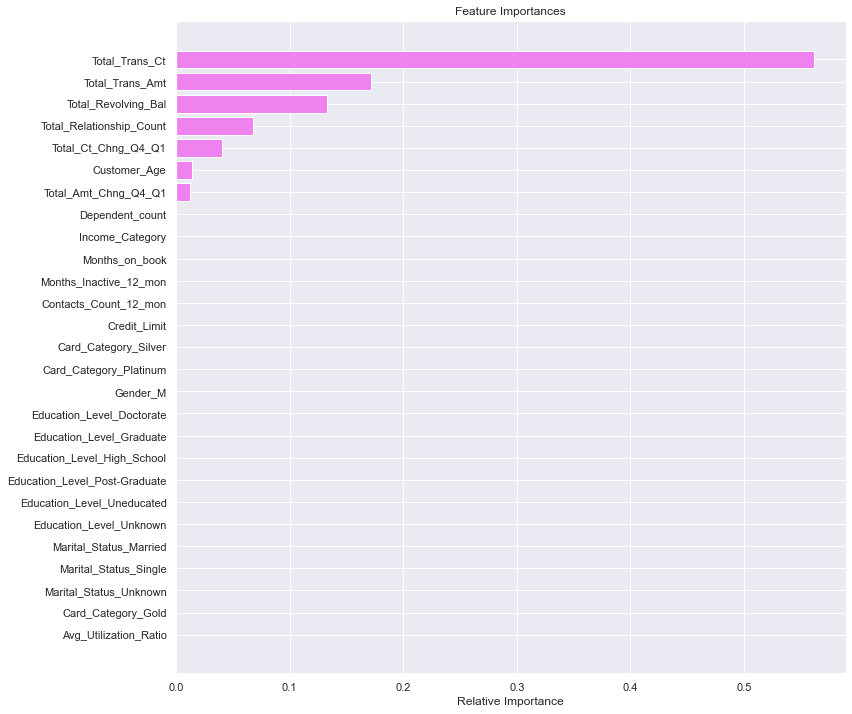

In [156]:
importances =dtree_tuned_rs[-1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**
- The decision tree random search model fit the data well as recall is 93% for training data and 91% for test data
- The most important variable was Total_Trans_Ct
- Model ran in 0.10 mins compared to over 1 min for grid search
- The random search model was faster and more accurate 


### Build Random Forest  Model

In [157]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

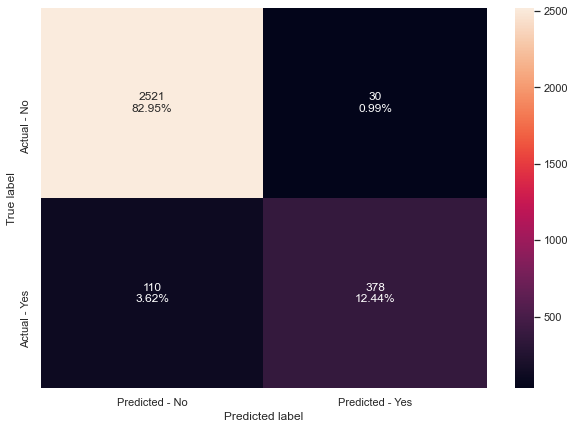

In [158]:
make_confusion_matrix(rf_estimator,y_test)

In [160]:
get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.953932214544258
Recall on training set :  1.0
Recall on test set :  0.7745901639344263
Precision on training set :  1.0
Precision on test set :  0.9264705882352942


[1.0, 0.953932214544258, 1.0, 0.7745901639344263, 1.0, 0.9264705882352942]

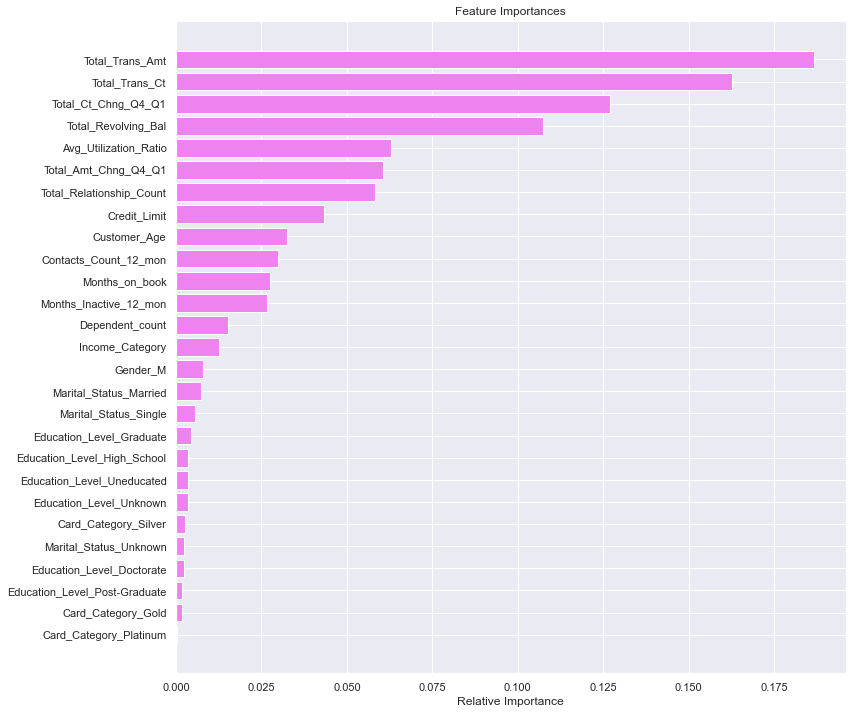

In [161]:
importances =rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**
- The Random Forest model without parameter restictions overfit the data as recall is 100% for training data and 77% for test data
- The most important variables are Total_Trans_Amt and Total_Trans_Ct



### Build Random Forest  Model using grid search

In [162]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))
rf_estimator_tuned_gs = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article

parameters = {
    "randomforestclassifier__class_weight": [{0: 0.2, 1: 0.8}],
    "randomforestclassifier__n_estimators": [150,200,250],
    "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
    "randomforestclassifier__max_features": np.arange(0.2, 0.7, 0.1),
    "randomforestclassifier__max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()
grid_obj = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=acc_scorer,cv=5,verbose=10,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

rf_estimator_tuned_gs = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned_gs.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Grid Search takes 9.72 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},
                                        max_features=0.6000000000000001,
                                        max_samples=0.6000000000000001,
                                        min_samples_leaf=8, n_estimators=150,
                                        random_state=1))])

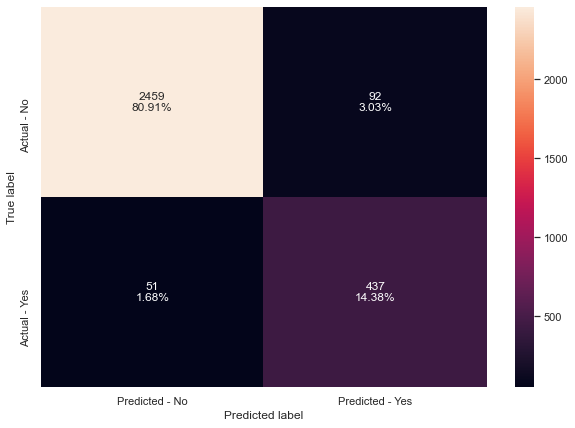

In [163]:
make_confusion_matrix(rf_estimator_tuned_gs,y_test)

In [164]:
get_metrics_score(rf_estimator_tuned_gs)

Accuracy on training set :  0.9655756207674944
Accuracy on test set :  0.9529450477130635
Recall on training set :  0.9569798068481123
Recall on test set :  0.8954918032786885
Precision on training set :  0.8482490272373541
Precision on test set :  0.8260869565217391


[0.9655756207674944,
 0.9529450477130635,
 0.9569798068481123,
 0.8954918032786885,
 0.8482490272373541,
 0.8260869565217391]

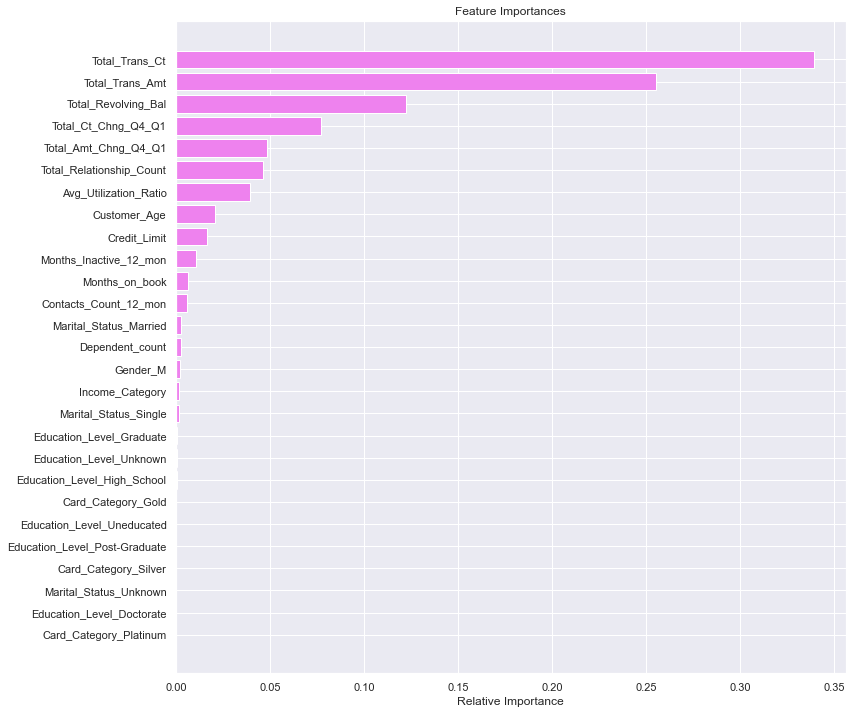

In [166]:
importances =rf_estimator_tuned_gs[-1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**
- The Random Forest with grid search model slightly overfit the data was recall is 96% for training data and 90% for test data
- The most important variables are Total_Trans_Amt and Total_Trans_Ct

### Build Random Forest  Model using Randomized search

In [167]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))
rf_estimator_tuned_rs = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article

parameters = {
    "randomforestclassifier__class_weight": [{0: 0.2, 1: 0.8}],
    "randomforestclassifier__n_estimators": np.arange(1,500,50),
    "randomforestclassifier__min_samples_leaf": np.arange(1, 50,5),
    "randomforestclassifier__max_features": np.arange(0.1, 0.8, 0.05),
    "randomforestclassifier__max_samples": np.arange(0.1, 0.8, 0.05),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, n_iter=50, scoring=acc_scorer, cv=5, random_state=1,verbose=10,n_jobs=-1)




randomized_cv = randomized_cv.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

rf_estimator_tuned_rs = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned_rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Grid Search takes 1.23 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},
                                        max_features=0.7500000000000002,
                                        max_samples=0.7000000000000002,
                                        min_samples_leaf=16, n_estimators=151,
                                        random_state=1))])

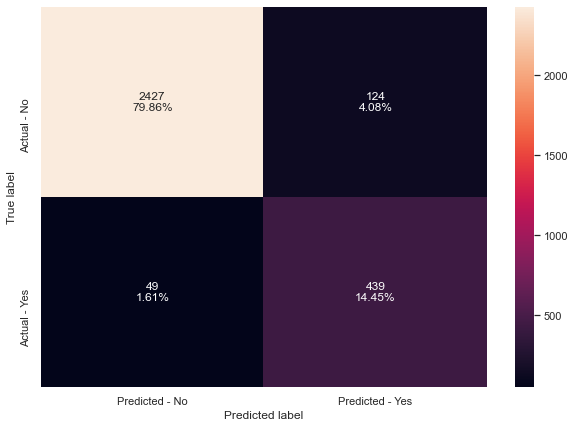

In [168]:
make_confusion_matrix(rf_estimator_tuned_rs,y_test)

In [89]:
get_metrics_score(rf_estimator_tuned_rs)

Accuracy on training set :  0.9517494356659142
Accuracy on test set :  0.9407699901283317
Recall on training set :  0.9473222124670764
Recall on test set :  0.8995901639344263
Precision on training set :  0.7927994121969141
Precision on test set :  0.7701754385964912


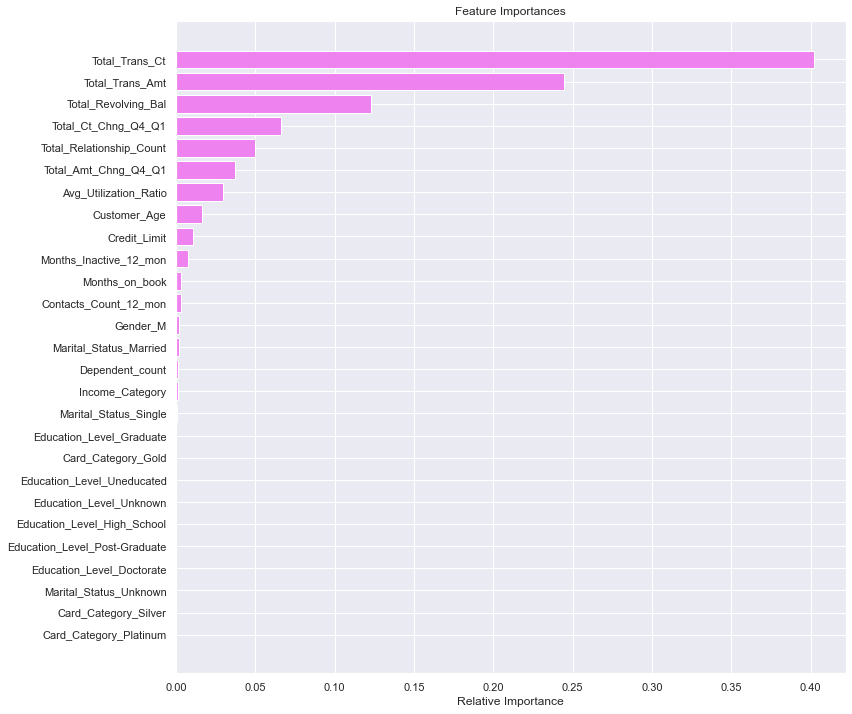

In [170]:
importances =rf_estimator_tuned_rs[-1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**
- The Random Forest with grid search model slightly overfit the data was recall is 95% for training data and 90% for test data
- The most important variables are Total_Trans_Amt and Total_Trans_Ct

### Build Bagging  Model

In [171]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

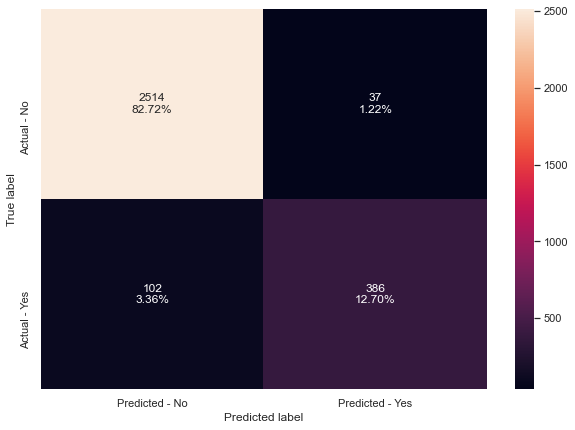

In [172]:
make_confusion_matrix(bagging_estimator,y_test)

In [195]:
#Return the scoring metrics 
get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9964729119638827
Accuracy on test set :  0.9542612701546561
Recall on training set :  0.9806848112379281
Recall on test set :  0.7909836065573771
Precision on training set :  0.9973214285714286
Precision on test set :  0.9125295508274232


[0.9964729119638827,
 0.9542612701546561,
 0.9806848112379281,
 0.7909836065573771,
 0.9973214285714286,
 0.9125295508274232]

**Insights**
- The Bagging model without any parameter restrictions overfit the data was recall is 98% for training data and 79% for test data

### Build Bagging Model using grid search

In [217]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))
bagging_estimator_tuned_gs = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article

parameters = {
            
            'baggingclassifier__max_samples': [0.1,0.2,0.3,0.4], 
              'baggingclassifier__max_features': [0.1,0.2,0.3,0.5,0.7,1],
              'baggingclassifier__n_estimators' : [10,50,100,150,200],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()
grid_obj = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=acc_scorer,cv=5,verbose=10,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

bagging_estimator_tuned_gs = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
bagging_estimator_tuned_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Grid Search takes 1.20 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.7, max_samples=0.3,
                                   n_estimators=50, random_state=1))])

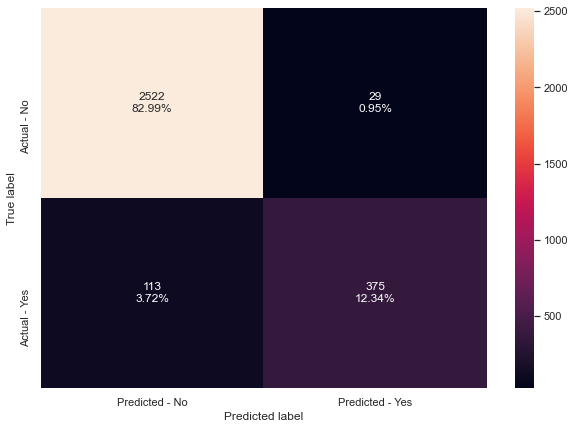

In [218]:
make_confusion_matrix(bagging_estimator_tuned_gs,y_test)

In [220]:
get_metrics_score(bagging_estimator_tuned_gs)

Accuracy on training set :  0.9830699774266366
Accuracy on test set :  0.9532741033234616
Recall on training set :  0.9104477611940298
Recall on test set :  0.7684426229508197
Precision on training set :  0.9829383886255925
Precision on test set :  0.9282178217821783


[0.9830699774266366,
 0.9532741033234616,
 0.9104477611940298,
 0.7684426229508197,
 0.9829383886255925,
 0.9282178217821783]

**Insights**
- The Bagging model with grid search overfit the data was recall is 91% for training data and 77% for test data
- The overfit was less than Bagging model without parameter restrictions

### Build Bagging Model using Random Search

In [222]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))
bagging_estimator_tuned_rs = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article


parameters = {
            
            'baggingclassifier__max_samples': np.arange(0,.5,.1) ,
              'baggingclassifier__max_features': np.arange(.3,1,.1),
              'baggingclassifier__n_estimators' : np.arange(50,500,50)
             }


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, n_iter=50, scoring=acc_scorer, cv=5, random_state=1,verbose=10,n_jobs=-1)




randomized_cv = randomized_cv.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

bagging_estimator_tuned_rs = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
bagging_estimator_tuned_rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Grid Search takes 2.43 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9000000000000001,
                                   max_samples=0.4, n_estimators=450,
                                   random_state=1))])

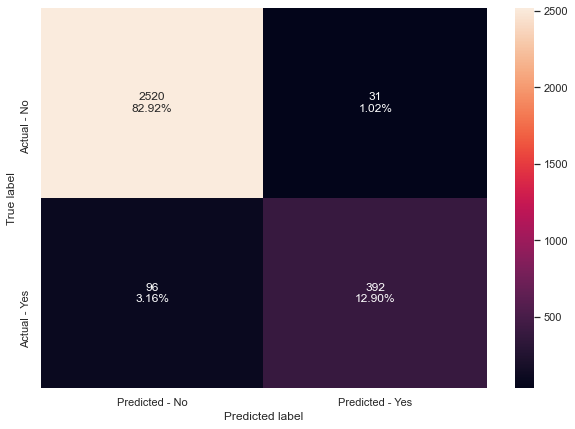

In [223]:
make_confusion_matrix(bagging_estimator_tuned_rs,y_test)

In [224]:
bagging_estimator_tuned_rs_score=get_metrics_score(bagging_estimator_tuned_rs)

Accuracy on training set :  0.9874435665914221
Accuracy on test set :  0.9582099374794341
Recall on training set :  0.9420544337137841
Recall on test set :  0.8032786885245902
Precision on training set :  0.9790145985401459
Precision on test set :  0.9267139479905437


**Insights**
- The Bagging model with random search overfit the data was recall is 94% for training data and 80% for test data
- This was the fastest bagging model

### Build AdaBoost  Model

In [225]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

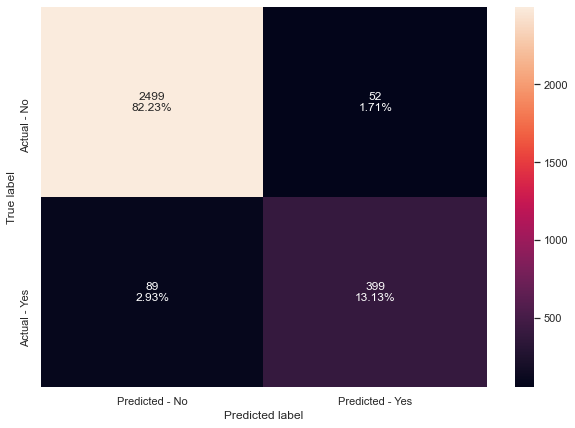

In [226]:
make_confusion_matrix(abc,y_test)

In [227]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.965293453724605
Accuracy on test set :  0.9536031589338598
Recall on training set :  0.8691834942932397
Recall on test set :  0.8176229508196722
Precision on training set :  0.9107635694572217
Precision on test set :  0.88470066518847


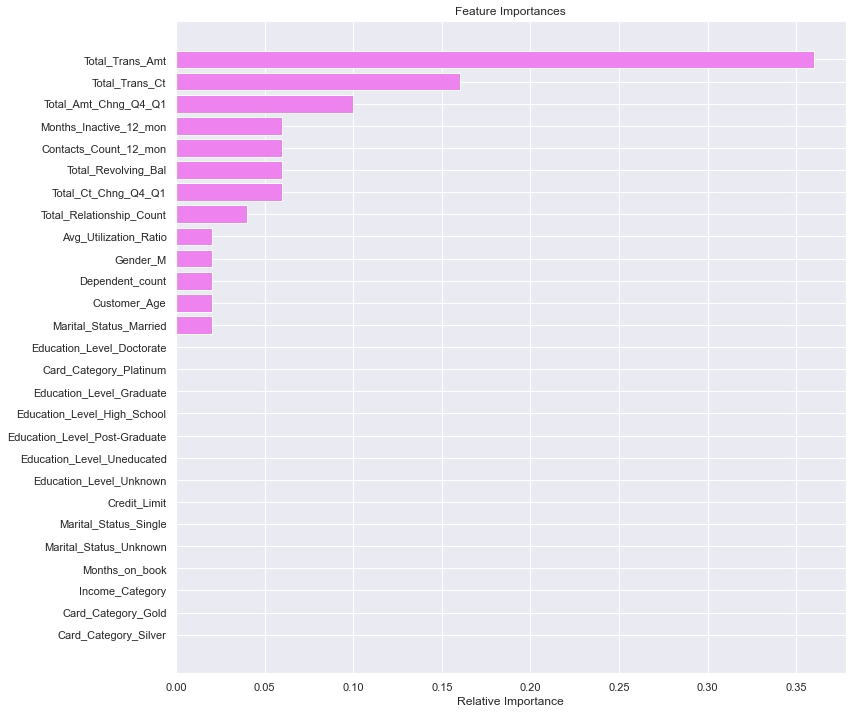

In [231]:
importances =abc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**
- The Ada boost without any parameter restrictions fit the data well the recall is 87% for training data and 82% for test data
-Total_Trans_Amt and  Total_Trans_Ct are the most important features

### Build AdaBoost  Model with grid search

In [232]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))
abc_tuned_gs = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article

parameters = {
    #Let's try different max_depth for base_estimator
    "adaboostclassifier__base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "adaboostclassifier__n_estimators": np.arange(10,110,10),
    "adaboostclassifier__learning_rate":np.arange(0.1,0.5,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()
grid_obj = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=acc_scorer,cv=5,verbose=10,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

abc_tuned_gs = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
abc_tuned_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Grid Search takes 1.97 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                    learning_rate=0.30000000000000004,
                                    n_estimators=60, random_state=1))])

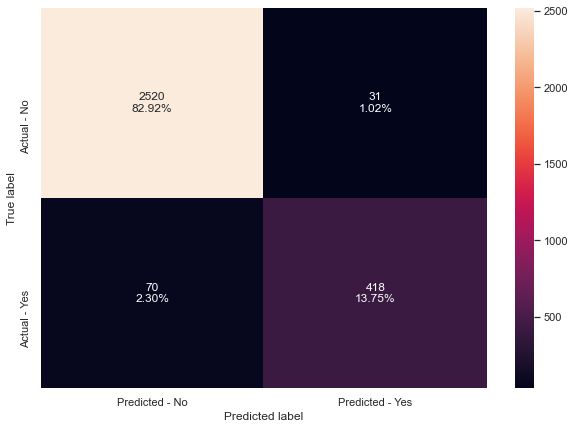

In [233]:
make_confusion_matrix(abc_tuned_gs,y_test)

In [234]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc_tuned_gs)

Accuracy on training set :  0.9901241534988713
Accuracy on test set :  0.9667653833497861
Recall on training set :  0.9587357330992098
Recall on test set :  0.8565573770491803
Precision on training set :  0.979372197309417
Precision on test set :  0.9309576837416481


**Insights**
- The ada boosting model  with grid search overfit the data was recall is 96% for training data and 86% for test data

### Build Ada Boost Model using Random Search

In [235]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))
abc_tuned_rs = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article


parameters = {
    #Let's try different max_depth for base_estimator
    "adaboostclassifier__base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "adaboostclassifier__n_estimators": np.arange(10,110,10),
    "adaboostclassifier__learning_rate":np.arange(0.1,0.8,0.1)
}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, n_iter=50, scoring=acc_scorer, cv=5, random_state=1,verbose=10,n_jobs=-1)




randomized_cv = randomized_cv.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

abc_tuned_rs = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
abc_tuned_rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Grid Search takes 0.87 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                    learning_rate=0.30000000000000004,
                                    n_estimators=90, random_state=1))])

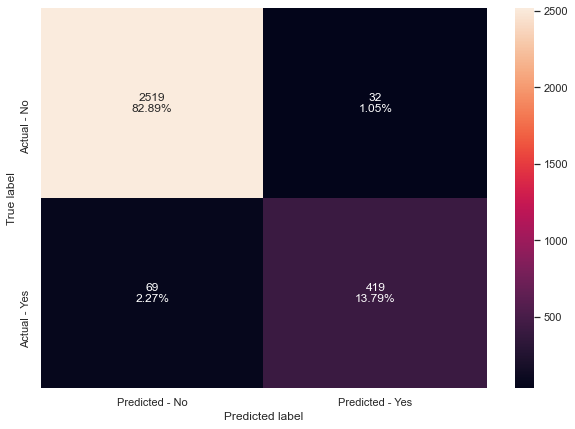

In [236]:
make_confusion_matrix(abc_tuned_rs,y_test)

In [237]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc_tuned_rs)

Accuracy on training set :  0.996755079006772
Accuracy on test set :  0.9667653833497861
Recall on training set :  0.9885864793678666
Recall on test set :  0.8586065573770492
Precision on training set :  0.9911971830985915
Precision on test set :  0.9290465631929047


**Insights**
- The Ada boost with random search overfit the data was recall is 99% for training data and 86% for test data

### Build GradientBoosting Model 

In [238]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

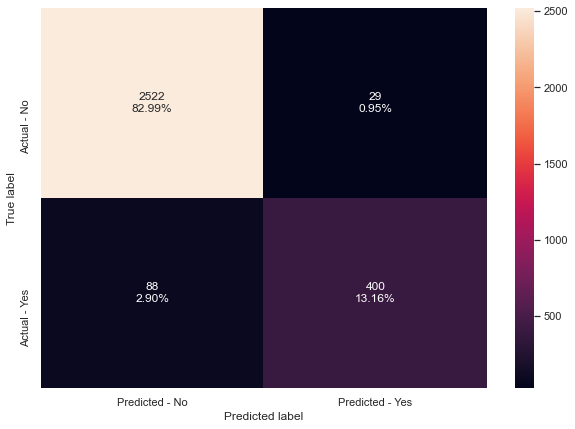

In [239]:
make_confusion_matrix(gbc,y_test)

In [240]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9770033860045146
Accuracy on test set :  0.9615004935834156
Recall on training set :  0.8928884986830553
Recall on test set :  0.819672131147541
Precision on training set :  0.9612476370510397
Precision on test set :  0.9324009324009324


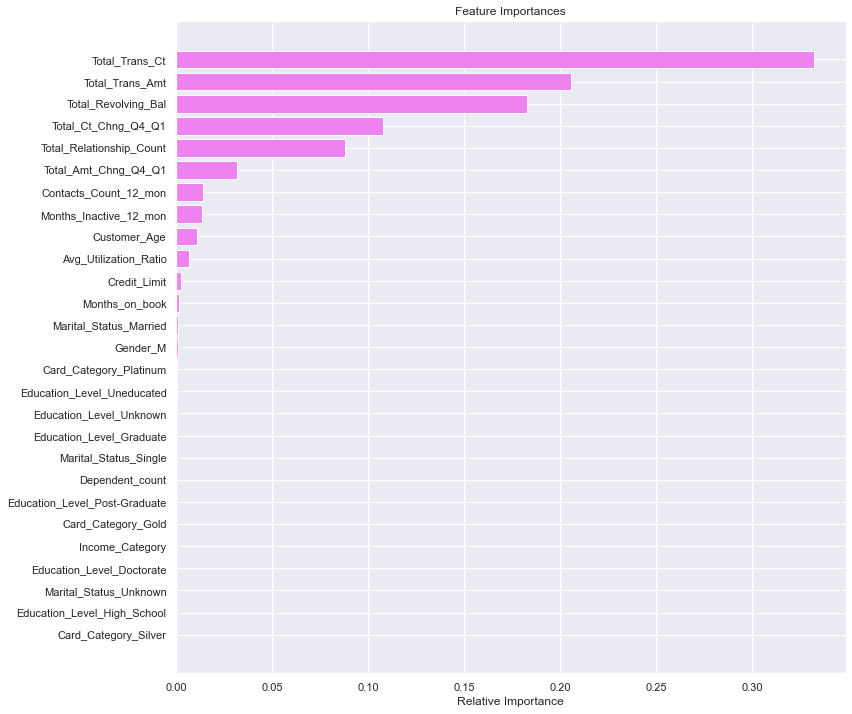

In [242]:
importances =gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**
- The Gradient boosting without any parameter restrictions fit the data well the recall is 89% for training data and 82% for test data
-Total_Trans_Amt and  Total_Trans_Ct are the most important features

### Build Gradient Boosting Model using Grid Search

In [243]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1))
gbc_tuned_gs = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article

parameters = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()
grid_obj = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=acc_scorer,cv=5,verbose=10,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

gbc_tuned_gs = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbc_tuned_gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Grid Search takes 2.18 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            max_features=0.9, n_estimators=250,
                                            random_state=1, subsample=0.9))])

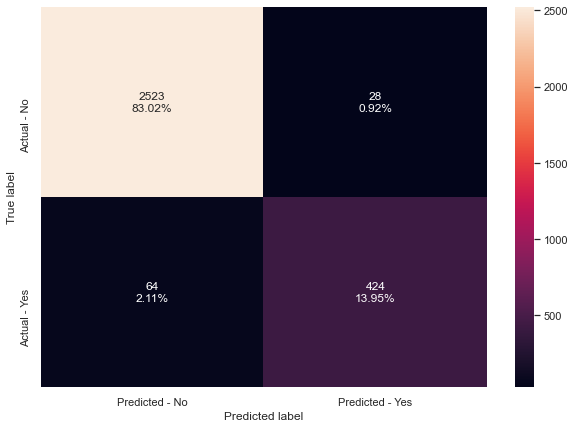

In [244]:
make_confusion_matrix(gbc_tuned_gs,y_test)

In [245]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_gs_score=get_metrics_score(gbc_tuned_gs)

Accuracy on training set :  0.989841986455982
Accuracy on test set :  0.9697268838433696
Recall on training set :  0.9587357330992098
Recall on test set :  0.8688524590163934
Precision on training set :  0.9776186213070726
Precision on test set :  0.9380530973451328


**Insights**
- The Gradient Boosting Model with grid search overfit the data was recall is 96% for training data and 87% for test data

### Build Gradient Boosting Model using Random Search

In [246]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1))
gbc_tuned_rs = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article


parameters = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":np.arange(.1,.8,.1),
    "gradientboostingclassifier__max_features":np.arange(.1,.8,.1)
}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, n_iter=50, scoring=acc_scorer, cv=5, random_state=1,verbose=10,n_jobs=-1)




randomized_cv = randomized_cv.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))


gbc_tuned_rs = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 

gbc_tuned_rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Grid Search takes 1.20 mins


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            max_features=0.7000000000000001,
                                            n_estimators=250, random_state=1,
                                            subsample=0.30000000000000004))])

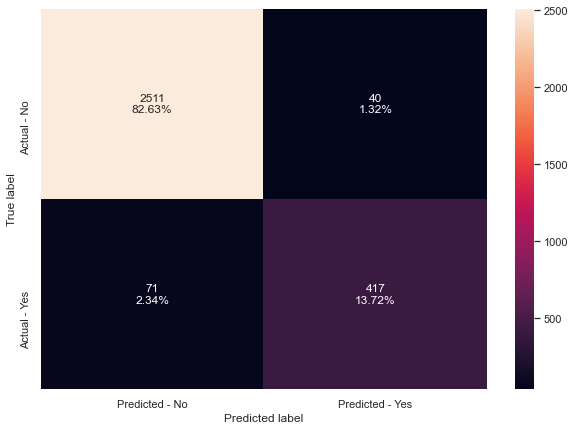

In [247]:
make_confusion_matrix(gbc_tuned_rs,y_test)

In [248]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_rs_score=get_metrics_score(gbc_tuned_rs)

Accuracy on training set :  0.9867381489841986
Accuracy on test set :  0.9634748272458046
Recall on training set :  0.9394205443371378
Recall on test set :  0.8545081967213115
Precision on training set :  0.9771689497716894
Precision on test set :  0.912472647702407


**Insights**
- The Gradient Boosting  model with random search slightly overfit the data was recall is 94% for training data and 85% for test data

### Build XGBoost model

In [249]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[20:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

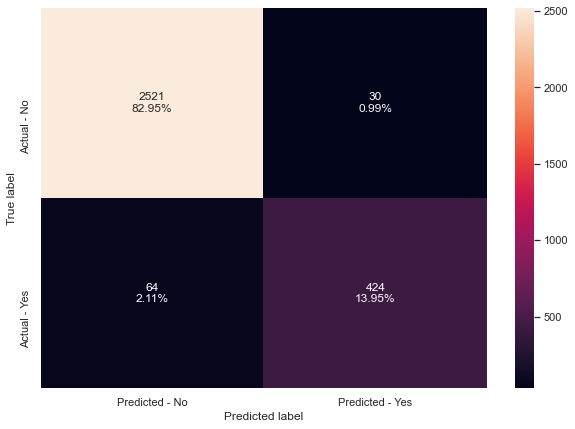

In [250]:
make_confusion_matrix(xgb,y_test)

In [251]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9690687726225732
Recall on training set :  1.0
Recall on test set :  0.8688524590163934
Precision on training set :  1.0
Precision on test set :  0.933920704845815


**Insights**
- The XG Boost without any parameter restrictions overfit the data was recall is 100% for training data and 87% for test data

### Build XG Boosting Model using Grid Search

In [252]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1))
xgb_tuned_gs = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from article

parameters = {
    "xgbclassifier__n_estimators": np.arange(10,100,30),
    "xgbclassifier__scale_pos_weight":[0,1,2,5],
    "xgbclassifier__subsample":[0.5,0.7],
    "xgbclassifier__learning_rate":[0.01,0.1,0.2,0.05],
    "xgbclassifier__gamma":[0,1,3],
    "xgbclassifier__colsample_bytree":[0.5,0.7],
    "xgbclassifier__colsample_bylevel":[0.5,0.7]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()
grid_obj = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=acc_scorer,cv=5,verbose=10,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))

xgb_tuned_gs = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned_gs.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[20:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Grid Search takes 142.13 mins
[22:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.7, colsample_bynode=1,
                               colsample_bytree=0.7, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=70,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
                               subsample=0.5, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

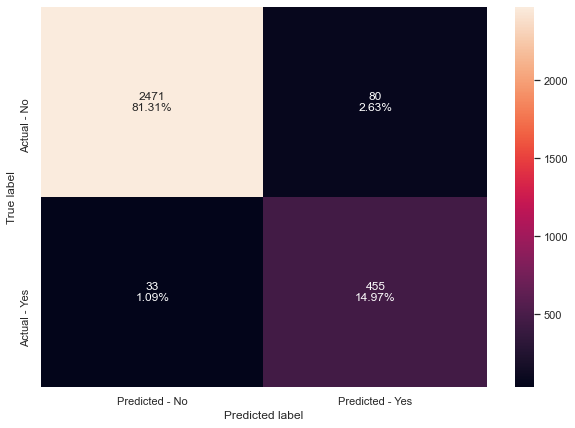

In [253]:
make_confusion_matrix(xgb_tuned_gs,y_test)

In [254]:
xgb_tuned_gs_score=get_metrics_score(xgb_tuned_gs)

Accuracy on training set :  0.9832110609480813
Accuracy on test set :  0.9628167160250082
Recall on training set :  0.9956101843722563
Recall on test set :  0.9323770491803278
Precision on training set :  0.9086538461538461
Precision on test set :  0.8504672897196262


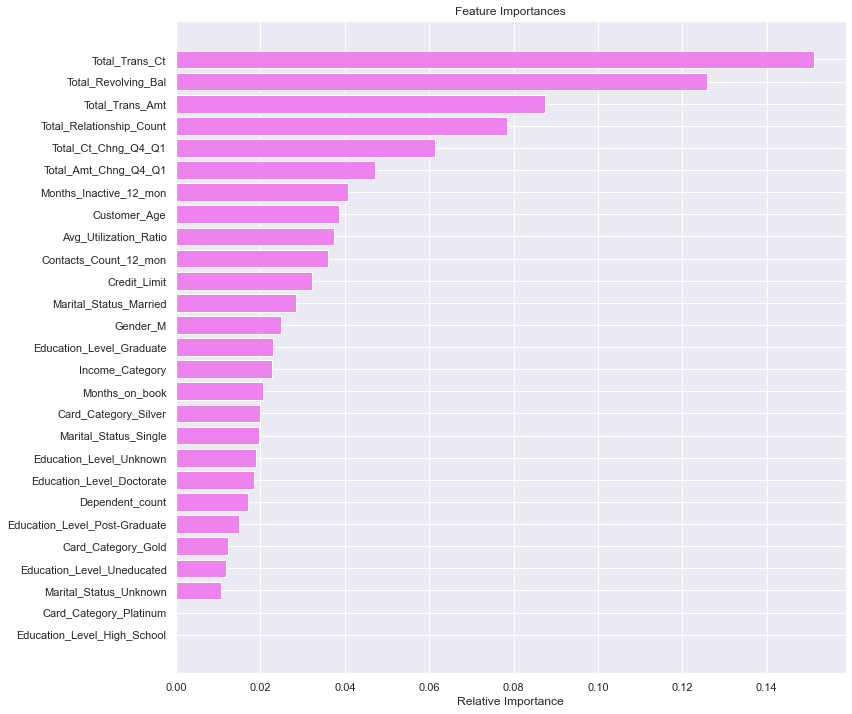

In [258]:
importances =xgb_tuned_gs[-1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**
- The XG Boosting model with grid search slightly overfit the data was recall is 100% for training data and 93% for test data
- Total_Revolving_Bal and  Total_Trans_Ct are the most important features

### Build XG Boosting Model using Random Search

In [300]:
# Choose the type of classifier. 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=2))
xgb_tuned_rs = XGBClassifier(random_state=2)

# Grid of parameters to choose from
## add from article


parameters = {
    "xgbclassifier__n_estimators": np.arange(10,100,30),
    "xgbclassifier__scale_pos_weight":[0,1,2,5],
    "xgbclassifier__subsample":np.arange(0.1,0.5,.1),
    "xgbclassifier__learning_rate":np.arange(0.01,0.1,.01),
    "xgbclassifier__colsample_bytree":np.arange(0.1,0.5,.1),
    "xgbclassifier__colsample_bylevel":np.arange(0.1,0.5,.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
t1 = datetime.now()

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, n_iter=50, scoring=acc_scorer, cv=5, random_state=1,verbose=10,n_jobs=-1)




randomized_cv = randomized_cv.fit(X_train, y_train)
t2 =datetime.now()
print("Grid Search takes %0.2f mins"%((t2-t1).seconds/60))


xgb_tuned_rs = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 

xgb_tuned_rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[07:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Grid Search takes 0.23 mins
[07:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.4, colsample_bynode=1,
                               colsample_bytree=0.30000000000000004, gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=70,
                               n_jobs=8, num_parallel_tree=1, random_state=2,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
                               subsample=0.2, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

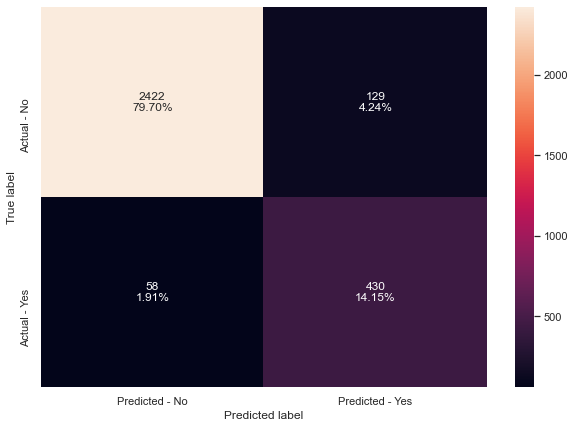

In [301]:
make_confusion_matrix(xgb_tuned_rs,y_test)

In [302]:
get_metrics_score(xgb_tuned_rs)

Accuracy on training set :  0.9525959367945824
Accuracy on test set :  0.9384666008555446
Recall on training set :  0.9420544337137841
Recall on test set :  0.8811475409836066
Precision on training set :  0.7989575577066269
Precision on test set :  0.7692307692307693


[0.9525959367945824,
 0.9384666008555446,
 0.9420544337137841,
 0.8811475409836066,
 0.7989575577066269,
 0.7692307692307693]

**Insights**
- The XG Boosting model with grid search slightly overfit the data was recall is 94% for training data and 88% for test data


## Comparing all models

In [304]:
models = [logmodel, logmodelup, logmodeldwn, dTree, dtree_tuned_gs, dtree_tuned_rs,rf_estimator,
rf_estimator_tuned_gs,rf_estimator_tuned_rs,bagging_estimator,bagging_estimator_tuned_gs,bagging_estimator_tuned_rs,abc,abc_tuned_gs,
abc_tuned_rs,gbc,gbc_tuned_gs,gbc_tuned_rs,xgb,xgb_tuned_gs,xgb_tuned_rs]

# defining empty lists to add train and test results
train_acc = []
test_acc = []
train_recall= []
test_recall= []
train_precision= []
test_precision= []


#train_acc,test_acc,train_recall,test_recall,train_precision,test_precision
for model in models:
    # accuracy score
    j = get_metrics_score(model,False)
    train_acc.append(j[0])
    test_acc.append(j[1])
    train_recall.append(j[2])
    test_recall.append(j[3])
    train_precision.append(j[4])
    test_precision.append(j[5])

In [305]:
comparison_frame = pd.DataFrame({'Model':['Logistic Model', 'Logistic Model with upsampling', 'Logistic Model with downsampling', 'Decision Tree', 'Decision Tree tuned with Grid Search', 'Decision Tree tuned with Random Search','Random Forest',
                                          'Random Forest tuned with Grid Search','Random Forest tuned with Random Search','Bagging','Bagging with Grid Search','Bagging with Random Search','Ada Boosting','Ada Boosting with Grid Search',
                                          'Ada Boosting with Random Search','Gradient Boosting','Gradient Boosting with Grid Search','Gradient Boosting with Random Search','XG Boosting','XG Boosting with Grid Search','XG Boosting with Random Search']
                                 , 
                                          'Training Accuracy': train_acc,'Test Accuracy': test_acc,
                                          'Training Recall':train_recall,'Test Recall':test_recall,
                                          'Training Precision':train_precision,'Test Precision':test_precision}) 
comparison_frame

Model  Training Accuracy  Test Accuracy  \
0                           Logistic Model           0.897009       0.891083   
1           Logistic Model with upsampling           0.852991       0.857519   
2         Logistic Model with downsampling           0.827878       0.840408   
3                            Decision Tree           1.000000       0.936821   
4     Decision Tree tuned with Grid Search           0.881208       0.883843   
5   Decision Tree tuned with Random Search           0.908014       0.905890   
6                            Random Forest           1.000000       0.953932   
7     Random Forest tuned with Grid Search           0.965576       0.952945   
8   Random Forest tuned with Random Search           0.951749       0.943073   
9                                  Bagging           0.996473       0.954261   
10                Bagging with Grid Search           0.983070       0.953274   
11              Bagging with Random Search           0.987444       0.958210   
12                            Ada Boosting           0.965293       0.953603   
13           Ada Boosting with Grid Search           0.990124       0.966765   
14         Ada Boosting with Random Search           0.996755       0.966765   
15                       Gradient Boosting           0.977003       0.961500   
16      Gradient Boosting with Grid Search           0.989842       0.969727   
17    Gradient Boosting with Random Search           0.986738       0.963475   
18                             XG Boosting           1.000000       0.969069   
19            XG Boosting with Grid Search           0.983211       0.962817   
20          XG Boosting with Random Search           0.952596       0.938467   

    Training Recall  Test Recall  Training Precision  Test Precision  
0          0.528534     0.502049            0.757233        0.735736  
1          0.655838     0.645492            0.534717        0.547826  
2          0.824407     0.815574            0.479326        0.501892  
3          1.000000     0.799180            1.000000        0.805785  
4          0.916594     0.885246            0.582915        0.592593  
5          0.926251     0.905738            0.650031        0.648094  
6          1.000000     0.774590            1.000000        0.926471  
7          0.956980     0.895492            0.848249        0.826087  
8          0.945566     0.899590            0.793662        0.779751  
9          0.980685     0.790984            0.997321        0.912530  
10         0.910448     0.768443            0.982938        0.928218  
11         0.942054     0.803279            0.979015        0.926714  
12         0.869183     0.817623            0.910764        0.884701  
13         0.958736     0.856557            0.979372        0.930958  
14         0.988586     0.858607            0.991197        0.929047  
15         0.892888     0.819672            0.961248        0.932401  
16         0.958736     0.868852            0.977619        0.938053  
17         0.939421     0.854508            0.977169        0.912473  
18         1.000000     0.868852            1.000000        0.933921  
19         0.995610     0.932377            0.908654        0.850467  
20         0.942054     0.881148            0.798958        0.769231

## Summary  of Comparisons
- Since this is a classification problem we used the confusion matrix and Accuracy, Recall and Precison as metrics of comparison.
- In this particular problem, recall was the metric of importance. The reason why is because targeting customers for marketing is expensive. 
- In general, the basic models without hyperparaters had a tendency to overfit. The logistic model and Adaboost classifer are the only ones that didn't overfit on the initial run.
- All the models can improve, but the question is how much computational  time should be used for the benefit of improvement. The random grid search tuned models ran extremely fast and almost had the same performance as grid search tuning. 
- The model I would use is the Decision Tree with Random Search as it is fast, accurate and did not over fit. It has a recall of 91% on test data. The precison isn't as high as i would like since it is 65%. This is an area i would like to improve in the future
- The timing of the models is below each of the model runs. Tuning with Random search was much faster and had roughly same performance as grid search depending on the ranges i chose.

## Business Recommendation 

- The Total_Trans_Ct, Total_Trans_Amt and Total_Revolving_Bal variables are the most predictive variables if a customer stays or closes the credit card.  The more a person uses credit less likely they are to leave. The company should think of programs that encourage the customer to spend on the card. Such as low interest rates or reward programs. The decision tree with random search can be used to target these members with roughly 91% recall. This would allow use to be confident we are targeting correct customers. The only down fall is that the precision is only 65% which means we would have 35% of the investment dollars targeting members who most likely wouldn't leave. We will have to do more revenue/cost analysis to make sure this is correct measure. This will require domain input on cost structure. 
- Observed that the gold card members are more likely to keep an open account. The company should potentially market the gold card program more.
- More member contacts the less frequent members use their card. This could indicate some operational problems or customer services issues that improved. 
